## load library and dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install statsmodels
import statsmodels.api as sm

In [3]:
pip install openpyxl

### income dataframe preparation

In [11]:
#@ loading the income data
df_income = pd.read_csv('/content/drive/MyDrive/FMC_Data/Income_variable/서울시 상권분석서비스(소득소비-행정동).csv', engine = 'python', encoding = 'cp949')
df_income.rename(columns={'행정동_코드': 'dong_cd'}, inplace=True)
df_income.head(3)

,기준_년분기_코드,dong_cd,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20241,11110680,창신2동,2112817,5,378781000,114626000,2615000,3824000,54984000,1872000,1625000,6167000,8797000,7498000,176773000
1,20241,11110670,창신1동,2393308,5,885535000,150365000,56693000,1192000,227077000,754000,29247000,35303000,92980000,49143000,242781000
2,20241,11170700,보광동,2545653,6,378073000,117293000,7390000,6950000,49139000,3287000,14383000,18357000,13263000,13958000,134053000


In [12]:
df_income.columns

Index(['기준_년분기_코드', 'dong_cd', '행정동_코드_명', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액',
       '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액',
       '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액', '기타_지출_총금액', '음식_지출_총금액'],
      dtype='object')

In [13]:
# filtering time into 2023-1st semester
df_income = df_income.loc[df_income['기준_년분기_코드'] == 20231, ['dong_cd', '행정동_코드_명', '월_평균_소득_금액', '지출_총금액']]

In [14]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, 50 to 1035
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dong_cd     425 non-null    int64 
 1   행정동_코드_명    425 non-null    object
 2   월_평균_소득_금액  425 non-null    int64 
 3   지출_총금액      425 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.6+ KB


In [20]:
df_income[df_income['dong_cd'] == 11680740]

,dong_cd,행정동_코드_명,월_평균_소득_금액,지출_총금액
1031,11680740,일원2동,4553185,1437085000


In [21]:
df_income[df_income['dong_cd'] == 11740520]

,dong_cd,행정동_코드_명,월_평균_소득_금액,지출_총금액
883,11740520,상일동,3690212,3300388000


### registered population dataframe preparation

In [18]:
df_registered_pop = pd.read_excel('/content/drive/MyDrive/FMC_Data/Population_variable/Registeredpopulation_by_dong_2023_1.xlsx', )
df_registered_pop.head()

,full_dong_name,gu,dong,dong_cd,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density
0,종로구사직동,종로구,사직동,11110530,4588,9371,1.98,1832,1.23,7618.699187
1,종로구삼청동,종로구,삼청동,11110540,1144,2616,2.02,632,1.49,1755.704698
2,종로구부암동,종로구,부암동,11110550,4122,9460,2.22,1830,2.27,4167.400881
3,종로구평창동,종로구,평창동,11110560,7248,17743,2.42,3548,8.87,2000.338219
4,종로구무악동,종로구,무악동,11110570,3014,8045,2.66,1489,0.36,22347.222222


### merge population and income

In [22]:
# Perform an outer join to include all rows from both dataframes
merged_outer = pd.merge(df_registered_pop, df_income, on='dong_cd', how='outer', indicator=True)

# Filter out the rows that caused the unmatch
unmatched_rows = merged_outer[merged_outer['_merge'] != 'both']
unmatched_rows

,full_dong_name,gu,dong,dong_cd,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density,행정동_코드_명,월_평균_소득_금액,지출_총금액,_merge
374,강남구개포3동,강남구,개포3동,11680675,7389.0,17186.0,2.32,3567.0,2.58,6661.240310,NaN,NaN,NaN,left_only
379,NaN,NaN,NaN,11680740,NaN,NaN,NaN,NaN,NaN,NaN,일원2동,4553185.0,1.437085e+09,right_only
409,NaN,NaN,NaN,11740520,NaN,NaN,NaN,NaN,NaN,NaN,상일동,3690212.0,3.300388e+09,right_only
410,강동구상일1동,강동구,상일1동,11740525,13601.0,39435.0,3.00,4956.0,1.82,21667.582418,NaN,NaN,NaN,left_only
411,강동구상일2동,강동구,상일2동,11740526,4856.0,12018.0,2.00,1941.0,1.09,11025.688073,NaN,NaN,NaN,left_only


In [23]:
# replace unmatched values with proper values
merged_outer.loc[merged_outer['dong_cd'] == 11680675, '월_평균_소득_금액'] = 4553185
merged_outer.loc[merged_outer['dong_cd'] == 11680675, '지출_총금액'] = 1437085000

merged_outer.loc[merged_outer['dong_cd'] == 11740525, '월_평균_소득_금액'] = 3690212
merged_outer.loc[merged_outer['dong_cd'] == 11740525, '지출_총금액'] = 3300388000
merged_outer.loc[merged_outer['dong_cd'] == 11740526, '월_평균_소득_금액'] = 3690212
merged_outer.loc[merged_outer['dong_cd'] == 11740526, '지출_총금액'] = 3300388000

In [25]:
# confirm replacement
unmatched_rows = merged_outer[merged_outer['_merge'] != 'both']
unmatched_rows

,full_dong_name,gu,dong,dong_cd,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density,행정동_코드_명,월_평균_소득_금액,지출_총금액,_merge
374,강남구개포3동,강남구,개포3동,11680675,7389.0,17186.0,2.32,3567.0,2.58,6661.240310,NaN,4553185.0,1.437085e+09,left_only
379,NaN,NaN,NaN,11680740,NaN,NaN,NaN,NaN,NaN,NaN,일원2동,4553185.0,1.437085e+09,right_only
409,NaN,NaN,NaN,11740520,NaN,NaN,NaN,NaN,NaN,NaN,상일동,3690212.0,3.300388e+09,right_only
410,강동구상일1동,강동구,상일1동,11740525,13601.0,39435.0,3.00,4956.0,1.82,21667.582418,NaN,3690212.0,3.300388e+09,left_only
411,강동구상일2동,강동구,상일2동,11740526,4856.0,12018.0,2.00,1941.0,1.09,11025.688073,NaN,3690212.0,3.300388e+09,left_only


In [26]:
merged_outer.columns

Index(['full_dong_name', 'gu', 'dong', 'dong_cd', 'HH', 'regist_pop',
       'regist_pop_per_HH', 'elderly_over_65', 'AREA_km2', 'pop_density',
       '행정동_코드_명', '월_평균_소득_금액', '지출_총금액', '_merge'],
      dtype='object')

In [27]:
# drop right_only
donginfo_df = merged_outer[merged_outer['_merge'] != 'right_only']
# drop some columns unnecessary
donginfo_df = donginfo_df.loc[:,['full_dong_name', 'gu', 'dong', 'dong_cd', 'HH', 'regist_pop',
       'regist_pop_per_HH', 'elderly_over_65', 'AREA_km2', 'pop_density','월_평균_소득_금액', '지출_총금액']]
donginfo_df

,full_dong_name,gu,dong,dong_cd,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density,월_평균_소득_금액,지출_총금액
0,종로구청운효자동,종로구,청운효자동,11110515,5117.0,11764.0,2.00,2172.0,2.57,4577.431907,3780222.0,2.784933e+09
1,종로구사직동,종로구,사직동,11110530,4588.0,9371.0,1.98,1832.0,1.23,7618.699187,5007768.0,5.609653e+10
2,종로구삼청동,종로구,삼청동,11110540,1144.0,2616.0,2.02,632.0,1.49,1755.704698,3442534.0,3.103159e+09
3,종로구부암동,종로구,부암동,11110550,4122.0,9460.0,2.22,1830.0,2.27,4167.400881,3647449.0,1.385759e+09
4,종로구평창동,종로구,평창동,11110560,7248.0,17743.0,2.42,3548.0,8.87,2000.338219,4504006.0,2.539729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
423,강동구성내2동,강동구,성내2동,11740650,12710.0,23414.0,1.80,4557.0,0.92,25450.000000,2824592.0,7.468956e+09
424,강동구성내3동,강동구,성내3동,11740660,10628.0,22984.0,2.13,4142.0,1.56,14733.333333,2897346.0,7.166681e+09
425,강동구길동,강동구,길동,11740685,21917.0,45225.0,2.05,8623.0,1.61,28090.062112,2840603.0,1.261826e+10
426,강동구둔촌1동,강동구,둔촌1동,11740690,40.0,74.0,1.63,11.0,1.02,72.549020,3596734.0,2.672900e+07


In [28]:
# save donginfo dataframe
donginfo_df.to_excel("/content/drive/MyDrive/FMC_Data/donginfo_df_426dongs_pop income spending.xlsx")

### To jump analysis directly

In [87]:
# # dong info 1)
# donginfo_df = pd.read_excel("/content/drive/MyDrive/FMC_Data/donginfo_df_426dongs_pop income spending.xlsx")
# # indices by dong in Metropolitan area 2)
# indices_by_dong_in_Seoul = pd.read_excel("/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/indices_by_dong.xlsx")
# 3) merged = 1) + 2)
merged_df = pd.read_excel("/content/drive/MyDrive/FMC_Data/matched_Seoul_dong_y_and_Xvariables.xlsx") # and go to Analysis
# 4) merged = 3) + de facto population by time zone
merged_df.to_excel("/content/drive/MyDrive/FMC_Data/matched_Seoul_dong_y_and_Xvariables_with_different time zone de facto populations.xlsx")

## Trip OD data preprocessing

### Preprocessing Step by Step Showing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/FMC_Data/M-B_dong_202303/seoul_purpose_admdong3_20230301.csv', engine='python')
# df = pd.read_csv('/content/drive/MyDrive/FMC_Data/M-B_dong_202303/seoul_purpose_admdong3_20230302.csv', engine='python')
# df = pd.read_csv('/content/drive/MyDrive/FMC_Data/M-B_dong_202303/seoul_purpose_admdong3_20230303.csv', engine='python')
# df = pd.read_csv('/content/drive/MyDrive/FMC_Data/M-B_dong_202303/seoul_purpose_admdong3_20230304.csv', engine='python')

In [4]:
df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,ST_TIME_CD,FNS_TIME_CD,IN_FORN_DIV_NM,FORN_CITIZ_NM,MOVE_PURPOSE,MOVE_DIST,MOVE_TIME,CNT,ETL_YMD
0,11110515,11110515,0,0,내국인,한국,7,407.30,1.970000,5.22,20230301
1,11110515,11110515,0,0,내국인,ㆍ값없음,3,282.80,0.508333,2.82,20230301
2,11110515,11110515,0,0,내국인,한국,3,380.60,3.776667,7.60,20230301
3,11110515,11110515,0,0,단기외국인,ㆍ값없음,3,212.10,1.651667,3.50,20230301
4,11110515,11110530,0,0,단기외국인,ㆍ값없음,7,744.65,6.870000,7.00,20230301


In [ ]:
# Drop rows where 'O_ADMDONG_CD' or 'D_ADMDONG_CD' is "\N" or blank
df = df[(df['O_ADMDONG_CD'] != '\\N') & (df['O_ADMDONG_CD'].notnull()) & (df['D_ADMDONG_CD'] != '\\N') & (df['D_ADMDONG_CD'].notnull())]

In [ ]:
df['O_ADMDONG_CD'] = df['O_ADMDONG_CD'].fillna(0).infer_objects(copy=False).astype(int)
df['D_ADMDONG_CD'] = df['D_ADMDONG_CD'].fillna(0).infer_objects(copy=False).astype(int)

In [ ]:
df = df[(df['O_ADMDONG_CD'] != 0) & (df['D_ADMDONG_CD']!=0)]

In [ ]:
# df['O_ADMDONG_CD'].value_counts(dropna = False).to_frame().to_excel("/content/drive/MyDrive/FMC_Data/M-B_dong_202303/O_ADMDONG_CD_value_counts_0304_after_process2.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11113762 entries, 0 to 11113996
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   O_ADMDONG_CD    int64  
 1   D_ADMDONG_CD    int64  
 2   ST_TIME_CD      int64  
 3   FNS_TIME_CD     int64  
 4   IN_FORN_DIV_NM  object 
 5   FORN_CITIZ_NM   object 
 6   MOVE_PURPOSE    int64  
 7   MOVE_DIST       float64
 8   MOVE_TIME       float64
 9   CNT             float64
 10  ETL_YMD         int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 1017.5+ MB


1: Going to Work, 2 : Going to School, 3: Going back to home, 4: Shopping, 5: Sightseeing/Tourism, 6: Hospital, 7: Others

In [ ]:
# Add product MOVE_DIST & MOVE_TIME
# Calculate the new variable and add it as a new column
df['MOVE_DISTxCNT'] = df['MOVE_DIST'] * df['CNT']
df['MOVE_TIMExCNT'] = df['MOVE_TIME'] * df['CNT']

In [ ]:
# Filter the purpose
df_24567 = df[df['MOVE_PURPOSE'].isin([2, 4, 5, 6, 7])]
df_1 = df[df['MOVE_PURPOSE']==1]
df_3 = df[df['MOVE_PURPOSE'] == 3]

In [ ]:
# Aggregate the dataset
# Aggregating purpose 2,4,5,6,7 (all except going to work(1) and coming back to home(3)) trip
aggregated_df_24567 = df_24567.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
    'CNT': 'sum',
    'MOVE_DISTxCNT': 'sum',
    'MOVE_TIMExCNT': 'sum'
}).reset_index()

# Aggregating purpose 1 (going to work) trip
aggregated_df_1 = df_1.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
    'CNT': 'sum',
    'MOVE_DISTxCNT': 'sum',
    'MOVE_TIMExCNT': 'sum'
}).reset_index()

In [ ]:
# Merge the two aggregated DataFrames on ['O_ADMDONG_CD', 'D_ADMDONG_CD']
merged_df = pd.merge(aggregated_df_24567, aggregated_df_1, on=['O_ADMDONG_CD', 'D_ADMDONG_CD'], suffixes=('_24567', '_1'), how='left')

# Fill NaN values with 0 (in case there are no purpose 1 trips for some O-D pairs)
merged_df = merged_df.fillna(0)

In [ ]:
#@title Calculate the return trips after all non-work visits (RT-NonWork)
# Calculate the return trips after all non-work visits (RT-NonWork)
merged_df['RT-NonWork_CNT'] = merged_df['CNT_24567'] - merged_df['CNT_1']
merged_df['RT-NonWork_MOVE_DISTxCNT'] = merged_df['MOVE_DISTxCNT_24567'] - merged_df['MOVE_DISTxCNT_1']
merged_df['RT-NonWork_MOVE_TIMExCNT'] = merged_df['MOVE_TIMExCNT_24567'] - merged_df['MOVE_TIMExCNT_1']

In [ ]:
#@title Aggregating purpose 3 (coming back to home) trip
aggregated_df_3 = df_3.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
    'CNT': 'sum',
    'MOVE_DISTxCNT': 'sum',
    'MOVE_TIMExCNT': 'sum'
}).reset_index()

# Rename columns to add the _3 suffix
aggregated_df_3.rename(columns={
    'CNT': 'CNT_3',
    'MOVE_DISTxCNT': 'MOVE_DISTxCNT_3',
    'MOVE_TIMExCNT': 'MOVE_TIMExCNT_3'
}, inplace=True)

# Merge the aggregated_df_3 with the merged_df that contains RT-NonWork data
final_merged_df = pd.merge(merged_df, aggregated_df_3, on=['O_ADMDONG_CD', 'D_ADMDONG_CD'], how='left')

# Fill NaN values with 0 (in case there are no purpose 3 trips for some O-D pairs)
final_merged_df = final_merged_df.fillna(0)

# Calculate the going home after work trips (RT-Work)
final_merged_df['RT-Work_CNT'] = final_merged_df['CNT_3'] - final_merged_df['RT-NonWork_CNT']
final_merged_df['RT-Work_MOVE_DISTxCNT'] = final_merged_df['MOVE_DISTxCNT_3'] - final_merged_df['RT-NonWork_MOVE_DISTxCNT']
final_merged_df['RT-Work_MOVE_TIMExCNT'] = final_merged_df['MOVE_TIMExCNT_3'] - final_merged_df['RT-NonWork_MOVE_TIMExCNT']

# Select relevant columns for the final DataFrame
final_df = final_merged_df[['O_ADMDONG_CD', 'D_ADMDONG_CD', 'CNT_24567', 'CNT_1', 'MOVE_DISTxCNT_24567', 'MOVE_DISTxCNT_1', 'MOVE_TIMExCNT_24567', 'MOVE_TIMExCNT_1', 'RT-NonWork_CNT', 'RT-NonWork_MOVE_DISTxCNT', 'RT-NonWork_MOVE_TIMExCNT', 'CNT_3', 'MOVE_DISTxCNT_3', 'MOVE_TIMExCNT_3', 'RT-Work_CNT', 'RT-Work_MOVE_DISTxCNT', 'RT-Work_MOVE_TIMExCNT']]

# Reorder the columns in the final DataFrame
final_df = final_df[['O_ADMDONG_CD', 'D_ADMDONG_CD', 'CNT_1', 'CNT_3', 'CNT_24567',
                     'MOVE_DISTxCNT_1', 'MOVE_DISTxCNT_3', 'MOVE_DISTxCNT_24567',
                     'MOVE_TIMExCNT_1', 'MOVE_TIMExCNT_3', 'MOVE_TIMExCNT_24567',
                     'RT-NonWork_CNT', 'RT-NonWork_MOVE_DISTxCNT', 'RT-NonWork_MOVE_TIMExCNT',
                     'RT-Work_CNT', 'RT-Work_MOVE_DISTxCNT', 'RT-Work_MOVE_TIMExCNT']]

# add and work trip-related columns and non-work trip-related columns separately
count_df = final_df[['O_ADMDONG_CD', 'D_ADMDONG_CD','CNT_1', 'CNT_3', 'CNT_24567', 'RT-NonWork_CNT', 'RT-Work_CNT']]
work_related_df = final_df[['O_ADMDONG_CD', 'D_ADMDONG_CD', 'CNT_1', 'MOVE_DISTxCNT_1', 'MOVE_TIMExCNT_1', 'RT-Work_CNT', 'RT-Work_MOVE_DISTxCNT', 'RT-Work_MOVE_TIMExCNT']]

##### exporting file examples

In [ ]:
# # save the final DataFrame to a new CSV file
# final_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_2)Dist_3)Time_230301.csv', index=False)
# final_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_2)Dist_3)Time_230302.csv', index=False)
# final_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_2)Dist_3)Time_230303.csv', index=False)
# final_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_2)Dist_3)Time_230304.csv', index=False)

In [ ]:
# count_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_230301.csv', index=False)
# count_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_230302.csv', index=False)
# count_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_230303.csv', index=False)
# count_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_OD_1)Numtrip_230304.csv', index=False)

In [ ]:
# work_related_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_Work_OD_230301.csv', index=False)
# work_related_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_Work_OD_230302.csv', index=False)
# work_related_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_Work_OD_230303.csv', index=False)
# work_related_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_Dong_Work_OD_230304.csv', index=False)

### Preprocessing code (Loop)

In [ ]:
# Define the file path template
path_template = "/content/drive/MyDrive/FMC_Data/M-B_dong_202303/seoul_purpose_admdong3_202303{:02d}.csv"
output_path_template = "/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated count dist time each day_2/Aggregated_Dong_OD_1)Numtrip_2)Dist_3)Time_2303{:02d}.csv"
count_output_path_template = "/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_count_each day_2/Aggregated_Dong_OD_1)Numtrip_2303{:02d}.csv"
work_output_path_template = "/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_work_each day_2/Aggregated_Dong_Work_OD_2303{:02d}.csv"

# Loop over the files
for day in range(1, 32):  # Assuming files are numbered from 01 to 31
    path = path_template.format(day)
    df = pd.read_csv(path, engine='python')

    # preprocessing steps
    # Drop rows where 'O_ADMDONG_CD' or 'D_ADMDONG_CD' is "\N" or blank
    df = df[(df['O_ADMDONG_CD'] != '\\N') & (df['O_ADMDONG_CD'].notnull()) & (df['D_ADMDONG_CD'] != '\\N') & (df['D_ADMDONG_CD'].notnull())]
    df['O_ADMDONG_CD'] = df['O_ADMDONG_CD'].fillna(0).infer_objects(copy=False).astype(int) # df.loc[:, 'O_ADMDONG_CD']
    df['D_ADMDONG_CD'] = df['D_ADMDONG_CD'].fillna(0).infer_objects(copy=False).astype(int) # df.loc[:, 'D_ADMDONG_CD']
    df = df[(df['O_ADMDONG_CD'] != 0) & (df['D_ADMDONG_CD']!=0)]

    # Add product MOVE_DIST & MOVE_TIME
    # Calculate the new variable and add it as a new column
    df['MOVE_DISTxCNT'] = df['MOVE_DIST'] * df['CNT']
    df['MOVE_TIMExCNT'] = df['MOVE_TIME'] * df['CNT']

    # Filter the purpose
    df_24567 = df[df['MOVE_PURPOSE'].isin([2, 4, 5, 6, 7])]
    df_1 = df[df['MOVE_PURPOSE']==1]
    df_3 = df[df['MOVE_PURPOSE'] == 3]

    # Aggregate the dataset
    # Aggregating purpose 2,4,5,6,7 (all except going to work(1) and coming back to home(3)) trip
    aggregated_df_24567 = df_24567.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
        'CNT': 'sum',
        'MOVE_DISTxCNT': 'sum',
        'MOVE_TIMExCNT': 'sum'
    }).reset_index()

    # Aggregating purpose 1 (going to work) trip
    aggregated_df_1 = df_1.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
        'CNT': 'sum',
        'MOVE_DISTxCNT': 'sum',
        'MOVE_TIMExCNT': 'sum'
    }).reset_index()

    # Merge the two aggregated DataFrames on ['O_ADMDONG_CD', 'D_ADMDONG_CD']
    merged_df = pd.merge(aggregated_df_24567, aggregated_df_1, on=['O_ADMDONG_CD', 'D_ADMDONG_CD'], suffixes=('_24567', '_1'), how='left')

    # Fill NaN values with 0 (in case there are no purpose 1 trips for some O-D pairs)
    merged_df = merged_df.fillna(0)

    # Calculate the return trips after all non-work visits (RT-NonWork)
    merged_df['RT-NonWork_CNT'] = merged_df['CNT_24567'] - merged_df['CNT_1']
    merged_df.loc[merged_df['RT-NonWork_CNT'] < 0, 'RT-NonWork_CNT'] = 0
    merged_df['RT-NonWork_MOVE_DISTxCNT'] = merged_df['MOVE_DISTxCNT_24567'] - merged_df['MOVE_DISTxCNT_1']
    merged_df.loc[merged_df['RT-NonWork_MOVE_DISTxCNT'] < 0, 'RT-NonWork_MOVE_DISTxCNT'] = 0
    merged_df['RT-NonWork_MOVE_TIMExCNT'] = merged_df['MOVE_TIMExCNT_24567'] - merged_df['MOVE_TIMExCNT_1']
    merged_df.loc[merged_df['RT-NonWork_MOVE_TIMExCNT'] < 0, 'RT-NonWork_MOVE_TIMExCNT'] = 0

    # Aggregating purpose 3 (coming back to home) trip
    aggregated_df_3 = df_3.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
        'CNT': 'sum',
        'MOVE_DISTxCNT': 'sum',
        'MOVE_TIMExCNT': 'sum'
    }).reset_index()

    # Rename columns to add the _3 suffix
    aggregated_df_3.rename(columns={
        'CNT': 'CNT_3',
        'MOVE_DISTxCNT': 'MOVE_DISTxCNT_3',
        'MOVE_TIMExCNT': 'MOVE_TIMExCNT_3'
    }, inplace=True)

    # Merge the aggregated_df_3 with the merged_df that contains RT-NonWork data
    final_merged_df = pd.merge(merged_df, aggregated_df_3, on=['O_ADMDONG_CD', 'D_ADMDONG_CD'], how='left')

    # Fill NaN values with 0 (in case there are no purpose 3 trips for some O-D pairs)
    final_merged_df = final_merged_df.fillna(0)

    # Calculate the going home after work trips (RT-Work)
    final_merged_df['RT-Work_CNT'] = final_merged_df['CNT_3'] - final_merged_df['RT-NonWork_CNT']
    final_merged_df['RT-Work_MOVE_DISTxCNT'] = final_merged_df['MOVE_DISTxCNT_3'] - final_merged_df['RT-NonWork_MOVE_DISTxCNT']
    final_merged_df['RT-Work_MOVE_TIMExCNT'] = final_merged_df['MOVE_TIMExCNT_3'] - final_merged_df['RT-NonWork_MOVE_TIMExCNT']

    # Select relevant columns for the final DataFrame
    final_df = final_merged_df[['O_ADMDONG_CD', 'D_ADMDONG_CD', 'CNT_24567', 'CNT_1', 'MOVE_DISTxCNT_24567', 'MOVE_DISTxCNT_1', 'MOVE_TIMExCNT_24567', 'MOVE_TIMExCNT_1', 'RT-NonWork_CNT', 'RT-NonWork_MOVE_DISTxCNT', 'RT-NonWork_MOVE_TIMExCNT', 'CNT_3', 'MOVE_DISTxCNT_3', 'MOVE_TIMExCNT_3', 'RT-Work_CNT', 'RT-Work_MOVE_DISTxCNT', 'RT-Work_MOVE_TIMExCNT']]

    # Reorder the columns in the final DataFrame
    final_df = final_df[['O_ADMDONG_CD', 'D_ADMDONG_CD', 'CNT_1', 'CNT_3', 'CNT_24567',
                        'MOVE_DISTxCNT_1', 'MOVE_DISTxCNT_3', 'MOVE_DISTxCNT_24567',
                        'MOVE_TIMExCNT_1', 'MOVE_TIMExCNT_3', 'MOVE_TIMExCNT_24567',
                        'RT-NonWork_CNT', 'RT-NonWork_MOVE_DISTxCNT', 'RT-NonWork_MOVE_TIMExCNT',
                        'RT-Work_CNT', 'RT-Work_MOVE_DISTxCNT', 'RT-Work_MOVE_TIMExCNT']]

    # add and work trip-related columns and non-work trip-related columns separately
    count_df = final_df[['O_ADMDONG_CD', 'D_ADMDONG_CD','CNT_1', 'CNT_3', 'CNT_24567', 'RT-NonWork_CNT', 'RT-Work_CNT']]
    work_related_df = final_df[['O_ADMDONG_CD', 'D_ADMDONG_CD', 'CNT_1', 'MOVE_DISTxCNT_1', 'MOVE_TIMExCNT_1', 'RT-Work_CNT', 'RT-Work_MOVE_DISTxCNT', 'RT-Work_MOVE_TIMExCNT']]

    # Save the final DataFrames
    output_path = output_path_template.format(day)
    count_output_path = count_output_path_template.format(day)
    work_output_path = work_output_path_template.format(day)
    final_df.to_csv(output_path, index=False)
    count_df.to_csv(count_output_path, index=False)
    work_related_df.to_csv(work_output_path, index=False)

<ipython-input-3-ad231ca5bdd0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['O_ADMDONG_CD'] = df['O_ADMDONG_CD'].fillna(0).infer_objects(copy=False).astype(int)
<ipython-input-3-ad231ca5bdd0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['O_ADMDONG_CD'] = df['O_ADMDONG_CD'].fillna(0).infer_objects(copy=False).astype(int)
<ipython-input-3-ad231ca5bdd0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

### Concatenating Codes


#### load aggregated Num Dist Time data and combine those

In [ ]:
# Define the file path template
path_template = "/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated count dist time each day_2/Aggregated_Dong_OD_1)Numtrip_2)Dist_3)Time_2303{:02d}.csv"

# Create a list to store all data frames
df_list = []

# Loop over the files
for day in range(1, 32):  # Assuming files are numbered from 01 to 31
    path = path_template.format(day)
    df = pd.read_csv(path, engine='python')
    df_list.append(df)  # Add the current data frame to the list

In [ ]:
# Loop over the list and print the data type of 'O_ADMDONG_CD' and 'D_ADMDONG_CD'
for i, df in enumerate(df_list, start=1):
    print(f"DataFrame df{i}:")
    print(f"O_ADMDONG_CD dtype: {df['O_ADMDONG_CD'].dtype}")
    print(f"D_ADMDONG_CD dtype: {df['D_ADMDONG_CD'].dtype}")
    print()

DataFrame df1:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df2:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df3:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df4:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df5:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df6:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df7:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df8:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df9:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df10:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df11:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df12:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df13:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df14:
O_ADMDONG_CD dtype: int64
D_ADMDONG_CD dtype: int64

DataFrame df15:
O_ADMDONG_CD dtype: int64
D

In [ ]:
# Concatenate all the DataFrames in the list
big_df_noNan = pd.concat(df_list, ignore_index=True)

In [ ]:
# Check for the presence of '\\N'
contains_N = '\\N' in big_df_noNan['O_ADMDONG_CD'].values

# Print the results
print(f"Contains '\\N': {contains_N}")

Contains '\N': False


In [ ]:
# Check for the presence of '\\N'
contains_N = '\\N' in big_df_noNan['D_ADMDONG_CD'].values

# Print the results
print(f"Contains '\\N': {contains_N}")

Contains '\N': False


In [ ]:
# Aggregate each column by 'O_ADMDONG_CD' and 'D_ADMDONG_CD'
aggregated_df = big_df_noNan.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
    'CNT_1': 'sum',
    'CNT_3': 'sum',
    'CNT_24567': 'sum',
    'MOVE_DISTxCNT_1': 'sum',
    'MOVE_DISTxCNT_3': 'sum',
    'MOVE_DISTxCNT_24567': 'sum',
    'MOVE_TIMExCNT_1': 'sum',
    'MOVE_TIMExCNT_3': 'sum',
    'MOVE_TIMExCNT_24567': 'sum',
    'RT-NonWork_CNT': 'sum',
    'RT-NonWork_MOVE_DISTxCNT': 'sum',
    'RT-NonWork_MOVE_TIMExCNT': 'sum',
    'RT-Work_CNT': 'sum',
    'RT-Work_MOVE_DISTxCNT': 'sum',
    'RT-Work_MOVE_TIMExCNT': 'sum'
}).reset_index()

# Calculate the Average distance and times
aggregated_df['Avg_DIST_1'] = aggregated_df['MOVE_DISTxCNT_1']/aggregated_df['CNT_1']
aggregated_df['Avg_DIST_3'] = aggregated_df['MOVE_DISTxCNT_3']/aggregated_df['CNT_3']
aggregated_df['Avg_DIST_24567'] = aggregated_df['MOVE_DISTxCNT_24567']/aggregated_df['CNT_24567']
aggregated_df['Avg_RT_NonWork_DIST'] = aggregated_df['RT-NonWork_MOVE_DISTxCNT']/aggregated_df['RT-NonWork_CNT']
aggregated_df['Avg_RT_Work_DIST'] = aggregated_df['RT-Work_MOVE_DISTxCNT']/aggregated_df['RT-Work_CNT']

aggregated_df['Avg_TIME_1'] = aggregated_df['MOVE_TIMExCNT_1']/aggregated_df['CNT_1']
aggregated_df['Avg_TIME_3'] = aggregated_df['MOVE_TIMExCNT_3']/aggregated_df['CNT_3']
aggregated_df['Avg_TIME_24567'] = aggregated_df['MOVE_TIMExCNT_24567']/aggregated_df['CNT_24567']
aggregated_df['Avg_RT_NonWork_TIME'] = aggregated_df['RT-NonWork_MOVE_TIMExCNT']/aggregated_df['RT-NonWork_CNT']
aggregated_df['Avg_RT_Work_TIME'] = aggregated_df['RT-Work_MOVE_TIMExCNT']/aggregated_df['RT-Work_CNT']

In [ ]:
# save the aggregated DataFrame to a new CSV file
aggregated_df.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_COUNT_Dong-Dong count dist time_2023_03_ver2.csv', index=False)

In [ ]:
aggregated_df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,MOVE_DISTxCNT_1,MOVE_DISTxCNT_3,MOVE_DISTxCNT_24567,MOVE_TIMExCNT_1,MOVE_TIMExCNT_3,...,Avg_DIST_1,Avg_DIST_3,Avg_DIST_24567,Avg_RT_NonWork_DIST,Avg_RT_Work_DIST,Avg_TIME_1,Avg_TIME_3,Avg_TIME_24567,Avg_RT_NonWork_TIME,Avg_RT_Work_TIME
0,11110515,11110515,13045.84,52744.40,139766.81,5.762448e+06,2.384616e+07,7.622389e+07,202241.584854,935913.259475,...,441.707717,452.107828,545.364764,556.036188,630.135852,15.502381,17.744315,16.657959,16.776925,16.087187
1,11110515,11110530,11888.65,12368.02,108223.86,1.093979e+07,9.636553e+06,9.889134e+07,196172.996056,272984.440617,...,920.188156,779.150815,913.766482,912.973988,932.685588,16.500864,22.071798,22.247274,22.956434,23.086737
2,11110515,11110540,1498.43,2483.60,27594.13,1.694384e+06,2.434766e+06,2.791596e+07,34178.196937,47006.789224,...,1130.772783,980.337236,1011.662876,1004.823518,1007.399067,22.809338,18.926876,23.287716,23.315185,23.776762
3,11110515,11110550,1207.86,12662.17,14987.79,2.321612e+06,2.502406e+07,2.602437e+07,30283.334936,340036.886143,...,1922.087022,1976.284891,1736.371488,1720.092859,-1182.092825,25.071892,26.854551,22.120367,21.861655,-34.698690
4,11110515,11110560,1033.45,12025.93,7057.94,3.155446e+06,3.440110e+07,2.041584e+07,25791.165847,382875.122837,...,3053.313100,2860.576771,2892.606538,2865.038695,2856.097710,24.956375,31.837465,28.564834,29.183835,34.501287


In [ ]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204373 entries, 0 to 3204372
Data columns (total 27 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   O_ADMDONG_CD              int64  
 1   D_ADMDONG_CD              int64  
 2   CNT_1                     float64
 3   CNT_3                     float64
 4   CNT_24567                 float64
 5   MOVE_DISTxCNT_1           float64
 6   MOVE_DISTxCNT_3           float64
 7   MOVE_DISTxCNT_24567       float64
 8   MOVE_TIMExCNT_1           float64
 9   MOVE_TIMExCNT_3           float64
 10  MOVE_TIMExCNT_24567       float64
 11  RT-NonWork_CNT            float64
 12  RT-NonWork_MOVE_DISTxCNT  float64
 13  RT-NonWork_MOVE_TIMExCNT  float64
 14  RT-Work_CNT               float64
 15  RT-Work_MOVE_DISTxCNT     float64
 16  RT-Work_MOVE_TIMExCNT     float64
 17  Avg_DIST_1                float64
 18  Avg_DIST_3                float64
 19  Avg_DIST_24567            float64
 20  Avg_RT_NonWork_DIST     

#### count data frame concatenating

In [ ]:
# 1)NumTrip만 있는 데이터
# Define the file path template
path_template_1 = "/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_count_each day_2/Aggregated_Dong_OD_1)Numtrip_2303{:02d}.csv"

# Create a list to store all data frames
df_list_count_dfs = []

# Loop over the files
for day in range(1, 32):  # Assuming files are numbered from 01 to 31
    path = path_template_1.format(day)
    df = pd.read_csv(path, engine='python')
    df_list_count_dfs.append(df)  # Add the current data frame to the list

In [ ]:
# Concatenate all the DataFrames in the list
big_df_noNan_count = pd.concat(df_list_count_dfs, ignore_index=True)

In [ ]:
big_df_noNan_count.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT
0,11110515,11110515,284.56,1368.74,4820.87,4536.31,-3167.57
1,11110515,11110530,178.83,360.70,4323.70,4144.87,-3784.17
2,11110515,11110540,27.04,78.61,1313.01,1285.97,-1207.36
3,11110515,11110550,8.00,212.45,555.20,547.20,-334.75
4,11110515,11110560,10.86,247.46,181.50,170.64,76.82


In [ ]:
# Aggregate each column by 'O_ADMDONG_CD' and 'D_ADMDONG_CD'
aggregated_df_count = big_df_noNan_count.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
    'CNT_1': 'sum',
    'CNT_3': 'sum',
    'CNT_24567': 'sum',
    'RT-NonWork_CNT': 'sum',
    'RT-Work_CNT': 'sum',
}).reset_index()

aggregated_df_count.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44


In [ ]:
aggregated_df_count.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_Dong-Dong count_2023_03_ver2.csv', index=False)

In [ ]:
aggregated_df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204373 entries, 0 to 3204372
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   O_ADMDONG_CD    int64  
 1   D_ADMDONG_CD    int64  
 2   CNT_1           float64
 3   CNT_3           float64
 4   CNT_24567       float64
 5   RT-NonWork_CNT  float64
 6   RT-Work_CNT     float64
dtypes: float64(5), int64(2)
memory usage: 171.1 MB


#### work data concatenating

In [ ]:
# work related data
# Define the file path template
path_template_2 = "/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Aggregated_work_each day_2/Aggregated_Dong_Work_OD_2303{:02d}.csv"

# Create a list to store all data frames
df_list_work_dfs = []

# Loop over the files
for day in range(1, 32):  # Assuming files are numbered from 01 to 31
    path = path_template_2.format(day)
    df = pd.read_csv(path, engine='python')
    df_list_work_dfs.append(df)  # Add the current data frame to the list

In [ ]:
# Concatenate all the DataFrames in the list
big_df_noNan_work = pd.concat(df_list_work_dfs, ignore_index=True)

In [ ]:
big_df_noNan_work.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,MOVE_DISTxCNT_1,MOVE_TIMExCNT_1,RT-Work_CNT,RT-Work_MOVE_DISTxCNT,RT-Work_MOVE_TIMExCNT
0,11110515,11110515,284.56,109549.510095,5965.419822,-3167.57,-2.370552e+06,-47698.825285
1,11110515,11110530,178.83,170558.055333,4212.511008,-3784.17,-3.814989e+06,-99329.313177
2,11110515,11110540,27.04,26986.755000,357.353517,-1207.36,-1.175146e+06,-29104.742131
3,11110515,11110550,8.00,13774.779000,59.157267,-334.75,-4.163718e+05,-5357.646583
4,11110515,11110560,10.86,27939.470000,544.838700,76.82,2.124666e+05,2961.652415


In [ ]:
# Aggregate each column by 'O_ADMDONG_CD' and 'D_ADMDONG_CD'
aggregated_df_work = big_df_noNan_work.groupby(['O_ADMDONG_CD', 'D_ADMDONG_CD']).agg({
    'CNT_1': 'sum',
    'MOVE_DISTxCNT_1': 'sum',
    'MOVE_TIMExCNT_1': 'sum',
    'RT-Work_CNT': 'sum',
    'RT-Work_MOVE_DISTxCNT': 'sum',
    'RT-Work_MOVE_TIMExCNT': 'sum'
}).reset_index()

# Calculate the Average distance and times
aggregated_df_work['Avg_DIST_1'] = aggregated_df_work['MOVE_DISTxCNT_1']/aggregated_df_work['CNT_1']
aggregated_df_work['Avg_RT_Work_DIST'] = aggregated_df_work['RT-Work_MOVE_DISTxCNT']/aggregated_df_work['RT-Work_CNT']
aggregated_df_work['Avg_TIME_1'] = aggregated_df_work['MOVE_TIMExCNT_1']/aggregated_df_work['CNT_1']
aggregated_df_work['Avg_RT_Work_TIME'] = aggregated_df_work['RT-Work_MOVE_TIMExCNT']/aggregated_df_work['RT-Work_CNT']

# save the aggregated DataFrame to a new CSV file
aggregated_df_work.to_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_Work_Dong-Dong_2023_03_ver2.csv', index=False)

In [ ]:
big_df_noNan_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25824799 entries, 0 to 25824798
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   O_ADMDONG_CD           int64  
 1   D_ADMDONG_CD           int64  
 2   CNT_1                  float64
 3   MOVE_DISTxCNT_1        float64
 4   MOVE_TIMExCNT_1        float64
 5   RT-Work_CNT            float64
 6   RT-Work_MOVE_DISTxCNT  float64
 7   RT-Work_MOVE_TIMExCNT  float64
dtypes: float64(6), int64(2)
memory usage: 1.5 GB


### Calculate Self-containment and Pull-Effect

#### Count data calculation

In [ ]:
# load count aggregated data
# df = pd.read_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_Dong-Dong count_2023_03.csv')
df = pd.read_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_Dong-Dong count_2023_03_ver2.csv')

In [ ]:
df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44


In [ ]:
# Replace negative 'RT-NonWork_CNT' values with 0
merged_df.loc[merged_df['RT-NonWork_CNT'] < 0, 'RT-NonWork_CNT'] = 0

In [ ]:
# Calculate total non-work trips for each origin
total_origin_trips = df.groupby('O_ADMDONG_CD')['RT-NonWork_CNT'].sum()

# Calculate total non-work trips where origin = destination
self_trips = df[df['O_ADMDONG_CD'] == df['D_ADMDONG_CD']].groupby('O_ADMDONG_CD')['RT-NonWork_CNT'].sum()

# Calculate self-containment for each area
self_containment = self_trips / total_origin_trips
self_containment = self_containment.fillna(0)  # fill NaN values with 0

# Calculate total non-work trips for each destination, excluding trips where origin = destination
total_dest_trips = df[df['O_ADMDONG_CD'] != df['D_ADMDONG_CD']].groupby('D_ADMDONG_CD')['RT-NonWork_CNT'].sum()

# Calculate total non-work trips for each destination
total_trips = df.groupby('D_ADMDONG_CD')['RT-NonWork_CNT'].sum()

# Calculate pull-effect for each area
pull_effect = total_dest_trips / (total_trips - total_dest_trips)
pull_effect = pull_effect.fillna(0)  # fill NaN values with 0

In [ ]:
df_indices = pd.DataFrame({
    'O_ADMDONG_CD': self_containment.index,
    'Self-Containment': self_containment.values,
    'Pull-Effect': pull_effect.reindex(self_containment.index).values # Reindex to align with self_containment
})

In [ ]:
# filtering out inf pull-effect and zero self-containment
df_indices = df_indices.replace([np.inf, -np.inf], np.nan)  # replace 'inf' with NaN
df_indices = df_indices[(df_indices['Self-Containment'] != 0) & (df_indices['Pull-Effect'].notna())]

In [ ]:
df_indices

,O_ADMDONG_CD,Self-Containment,Pull-Effect
0,11110515,0.176837,5.445308
1,11110530,0.100082,8.162255
2,11110540,0.061663,18.346646
3,11110550,0.186918,4.935858
4,11110560,0.188736,3.819283
...,...,...,...
1747,41830370,0.184626,3.602659
1748,41830380,0.206596,4.405287
1749,41830395,0.215578,3.122781
1750,41830400,0.461697,1.599690


In [ ]:
# read indices_with_Engname data (right)
df_name = pd.read_csv('/content/drive/MyDrive/FMC_Data/ADMI_202303.csv')

In [ ]:
# Combine 'sido' and 'gu' columns with a space in between
df_name['full_gu_name'] = df_name['SIDO_NM'] + ' ' + df_name['SGG_NM']
df_name.head()

,SIDO_NM,SGG_NM,ADMI_NM,ADMI_CD,FULL_NM,BASE_YM,full_gu_name
0,서울특별시,종로구,청운효자동,11110515,서울특별시 종로구 청운효자동,202303,서울특별시 종로구
1,서울특별시,종로구,사직동,11110530,서울특별시 종로구 사직동,202303,서울특별시 종로구
2,서울특별시,종로구,삼청동,11110540,서울특별시 종로구 삼청동,202303,서울특별시 종로구
3,서울특별시,종로구,부암동,11110550,서울특별시 종로구 부암동,202303,서울특별시 종로구
4,서울특별시,종로구,평창동,11110560,서울특별시 종로구 평창동,202303,서울특별시 종로구


In [ ]:
# Merge origin dong's gu name on the df_indices
selected_cols_to_merge = ['ADMI_CD', 'FULL_NM', 'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM']
merged_df = pd.merge(df_indices, df_name[selected_cols_to_merge], left_on = 'O_ADMDONG_CD', right_on = 'ADMI_CD', how = 'left')
merged_df = merged_df.drop(columns=['ADMI_CD'])
merged_df.head()

,O_ADMDONG_CD,Self-Containment,Pull-Effect,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM
0,11110515,0.176837,5.445308,서울특별시 종로구 청운효자동,서울특별시 종로구,서울특별시,종로구,청운효자동
1,11110530,0.100082,8.162255,서울특별시 종로구 사직동,서울특별시 종로구,서울특별시,종로구,사직동
2,11110540,0.061663,18.346646,서울특별시 종로구 삼청동,서울특별시 종로구,서울특별시,종로구,삼청동
3,11110550,0.186918,4.935858,서울특별시 종로구 부암동,서울특별시 종로구,서울특별시,종로구,부암동
4,11110560,0.188736,3.819283,서울특별시 종로구 평창동,서울특별시 종로구,서울특별시,종로구,평창동


In [ ]:
merged_df.to_excel('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/indices_by_dong.xlsx', index=False)

#### adding English name of each dong

In [ ]:
# Load the indices file
indices_should_translate = pd.read_excel("/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/indices.xlsx", sheet_name = "all")

# Load the translation file
translation_df = pd.read_excel('/content/drive/MyDrive/FMC_Data/Eng_name_of_Korean_districts/Kor_to_Eng.xlsx', sheet_name = "hdong_eng_noje")
translation_df.head()

,code,Kor,Eng
0,1100000000,서울특별시,Seoul
1,1111000000,종로구,Jongno-gu
2,1111051500,청운효자동,Cheongunhyoja-dong
3,1111053000,사직동,Sajik-dong
4,1111054000,삼청동,Samcheong-dong


In [ ]:
indices_should_translate.head()

,ADMDONG_CD,Self-Containment,Pull-Effect,full_dong_name_in_Korean,sido,gu,dong,Unnamed: 7
0,11110515,0.177547,5.387227,서울특별시 종로구 청운효자동,서울특별시,종로구,청운효자동,NaN
1,11110530,0.100134,6.339530,서울특별시 종로구 사직동,서울특별시,종로구,사직동,NaN
2,11110540,0.061726,17.950530,서울특별시 종로구 삼청동,서울특별시,종로구,삼청동,NaN
3,11110550,0.188348,4.892523,서울특별시 종로구 부암동,서울특별시,종로구,부암동,NaN
4,11110560,0.192758,3.782845,서울특별시 종로구 평창동,서울특별시,종로구,평창동,NaN


In [ ]:
indices_should_translate = indices_should_translate.drop(columns=['Unnamed: 7'])

In [ ]:
# Create a dictionary from the translation DataFrame
translation_dict = translation_df.set_index('Kor')['Eng'].to_dict()

# Copy the Korean names to a new column and replace the words using the translation dictionary
indices_should_translate['full_dong_name_in_English'] = indices_should_translate['full_dong_name_in_Korean'].replace(translation_dict, regex=True)

In [ ]:
indices_should_translate.head()

,ADMDONG_CD,Self-Containment,Pull-Effect,full_dong_name_in_Korean,sido,gu,dong,full_dong_name_in_English
0,11110515,0.177547,5.387227,서울특별시 종로구 청운효자동,서울특별시,종로구,청운효자동,Seoul Jongno-gu Cheongunhyoja-dong
1,11110530,0.100134,6.339530,서울특별시 종로구 사직동,서울특별시,종로구,사직동,Seoul Jongno-gu Sajik-dong
2,11110540,0.061726,17.950530,서울특별시 종로구 삼청동,서울특별시,종로구,삼청동,Seoul Jongno-gu Samcheong-dong
3,11110550,0.188348,4.892523,서울특별시 종로구 부암동,서울특별시,종로구,부암동,Seoul Jongno-gu Buam-dong
4,11110560,0.192758,3.782845,서울특별시 종로구 평창동,서울특별시,종로구,평창동,Seoul Jongno-gu Pyeongchang-dong


In [ ]:
indices_should_translate.to_excel("/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/indices_with_Engname.xlsx")

## Analysis

In [5]:
# donginfo data look
donginfo_df.head()

,Unnamed: 0,full_dong_name,gu,dong,dong_cd,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density,월_평균_소득_금액,지출_총금액
0,0,종로구청운효자동,종로구,청운효자동,11110515,5117,11764,2.00,2172,2.57,4577.431907,3780222,2784933000
1,1,종로구사직동,종로구,사직동,11110530,4588,9371,1.98,1832,1.23,7618.699187,5007768,56096531000
2,2,종로구삼청동,종로구,삼청동,11110540,1144,2616,2.02,632,1.49,1755.704698,3442534,3103159000
3,3,종로구부암동,종로구,부암동,11110550,4122,9460,2.22,1830,2.27,4167.400881,3647449,1385759000
4,4,종로구평창동,종로구,평창동,11110560,7248,17743,2.42,3548,8.87,2000.338219,4504006,2539729000


In [8]:
donginfo_df.rename(columns={'Unnamed: 0': 'O_ADMDONG_CD'}, inplace=True)

In [11]:
donginfo_df['O_ADMDONG_CD'] = donginfo_df['dong_cd']

In [12]:
donginfo_df.head()

,O_ADMDONG_CD,full_dong_name,gu,dong,dong_cd,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density,월_평균_소득_금액,지출_총금액
0,11110515,종로구청운효자동,종로구,청운효자동,11110515,5117,11764,2.00,2172,2.57,4577.431907,3780222,2784933000
1,11110530,종로구사직동,종로구,사직동,11110530,4588,9371,1.98,1832,1.23,7618.699187,5007768,56096531000
2,11110540,종로구삼청동,종로구,삼청동,11110540,1144,2616,2.02,632,1.49,1755.704698,3442534,3103159000
3,11110550,종로구부암동,종로구,부암동,11110550,4122,9460,2.22,1830,2.27,4167.400881,3647449,1385759000
4,11110560,종로구평창동,종로구,평창동,11110560,7248,17743,2.42,3548,8.87,2000.338219,4504006,2539729000


In [7]:
indices_by_dong_in_Seoul.head()

,O_ADMDONG_CD,Self-Containment,Pull-Effect,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM
0,11110515,0.176837,5.445308,서울특별시 종로구 청운효자동,서울특별시 종로구,서울특별시,종로구,청운효자동
1,11110530,0.100082,8.162255,서울특별시 종로구 사직동,서울특별시 종로구,서울특별시,종로구,사직동
2,11110540,0.061663,18.346646,서울특별시 종로구 삼청동,서울특별시 종로구,서울특별시,종로구,삼청동
3,11110550,0.186918,4.935858,서울특별시 종로구 부암동,서울특별시 종로구,서울특별시,종로구,부암동
4,11110560,0.188736,3.819283,서울특별시 종로구 평창동,서울특별시 종로구,서울특별시,종로구,평창동


In [13]:
#@title Perform outer join
merged_df = pd.merge(indices_by_dong_in_Seoul, donginfo_df, on = 'O_ADMDONG_CD', how = 'outer', indicator = True)
merged_df.head()

,O_ADMDONG_CD,Self-Containment,Pull-Effect,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM,full_dong_name,gu,...,dong_cd,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density,월_평균_소득_금액,지출_총금액,_merge
0,11110515,0.176837,5.445308,서울특별시 종로구 청운효자동,서울특별시 종로구,서울특별시,종로구,청운효자동,종로구청운효자동,종로구,...,11110515.0,5117.0,11764.0,2.00,2172.0,2.57,4577.431907,3780222.0,2.784933e+09,both
1,11110530,0.100082,8.162255,서울특별시 종로구 사직동,서울특별시 종로구,서울특별시,종로구,사직동,종로구사직동,종로구,...,11110530.0,4588.0,9371.0,1.98,1832.0,1.23,7618.699187,5007768.0,5.609653e+10,both
2,11110540,0.061663,18.346646,서울특별시 종로구 삼청동,서울특별시 종로구,서울특별시,종로구,삼청동,종로구삼청동,종로구,...,11110540.0,1144.0,2616.0,2.02,632.0,1.49,1755.704698,3442534.0,3.103159e+09,both
3,11110550,0.186918,4.935858,서울특별시 종로구 부암동,서울특별시 종로구,서울특별시,종로구,부암동,종로구부암동,종로구,...,11110550.0,4122.0,9460.0,2.22,1830.0,2.27,4167.400881,3647449.0,1.385759e+09,both
4,11110560,0.188736,3.819283,서울특별시 종로구 평창동,서울특별시 종로구,서울특별시,종로구,평창동,종로구평창동,종로구,...,11110560.0,7248.0,17743.0,2.42,3548.0,8.87,2000.338219,4504006.0,2.539729e+09,both


In [15]:
merged_df = merged_df[ merged_df['_merge'] == 'both']

In [16]:
#@title save matched Seoul dong y and X variables
merged_df.to_excel("/content/drive/MyDrive/FMC_Data/matched_Seoul_dong_y_and_Xvariables.xlsx")

#### Distribution of indices

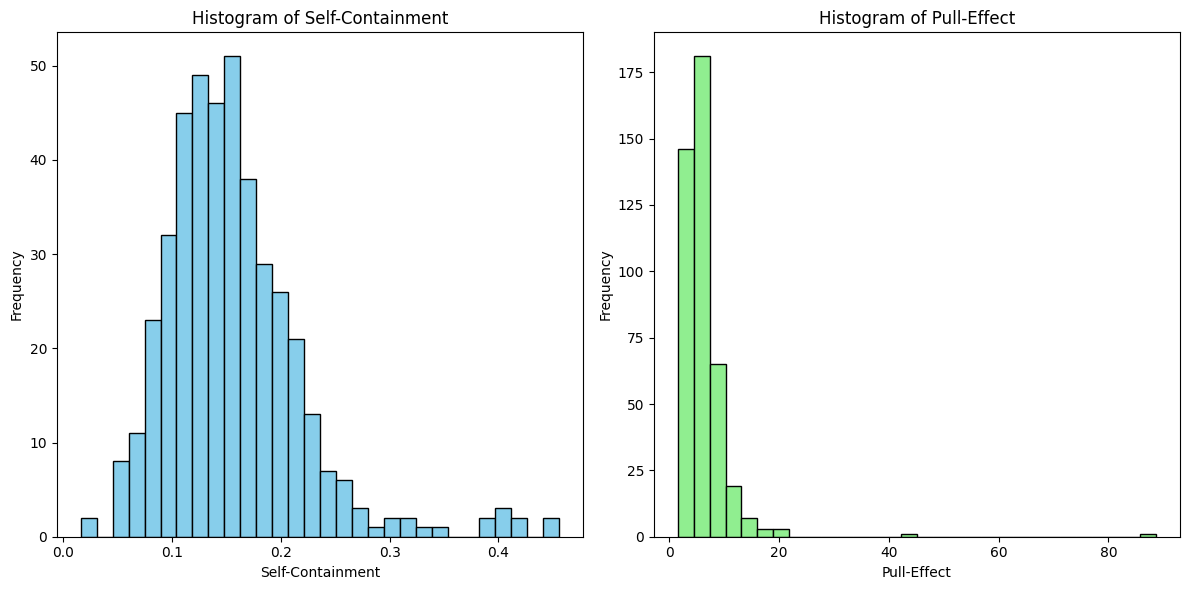

In [17]:
# Plotting the histogram for 'Self-Containment'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(merged_df['Self-Containment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Self-Containment')
plt.xlabel('Self-Containment')
plt.ylabel('Frequency')

# Plotting the histogram for 'Pull-Effect'
plt.subplot(1, 2, 2)
plt.hist(merged_df['Pull-Effect'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Pull-Effect')
plt.xlabel('Pull-Effect')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-19-6214a9869908>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['Self-Containment'], shade=True, color='skyblue')
<ipython-input-19-6214a9869908>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['Pull-Effect'], shade=True, color='lightgreen')


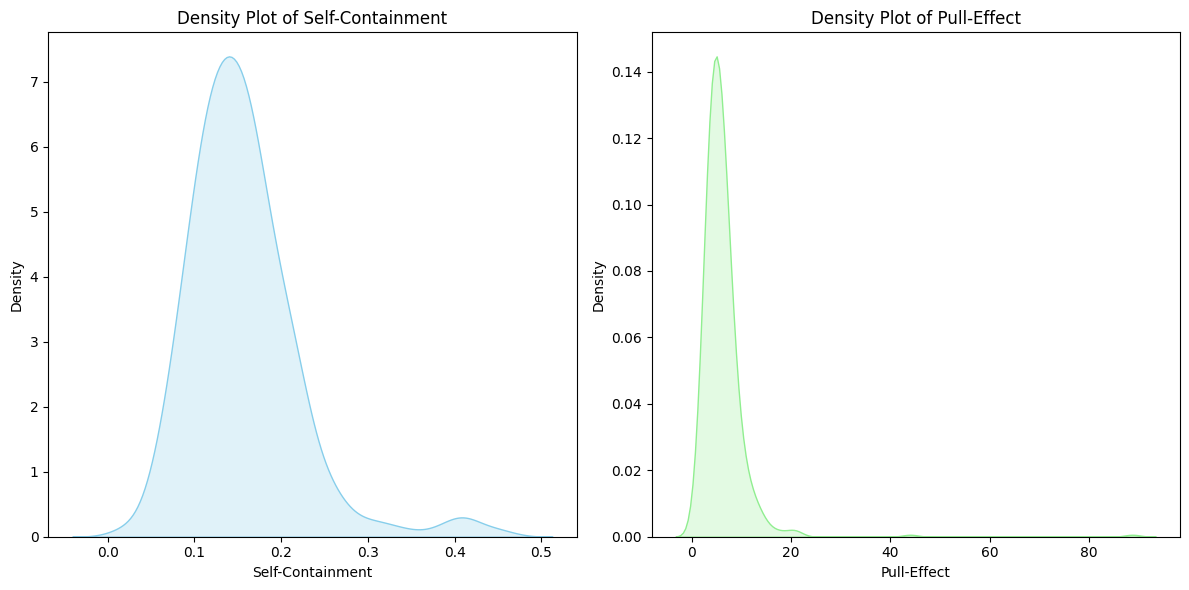

In [19]:
# Plotting the density plot for 'Self-Containment'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(merged_df['Self-Containment'], shade=True, color='skyblue')
plt.title('Density Plot of Self-Containment')
plt.xlabel('Self-Containment')
plt.ylabel('Density')

# Plotting the density plot for 'Pull-Effect'
plt.subplot(1, 2, 2)
sns.kdeplot(merged_df['Pull-Effect'], shade=True, color='lightgreen')
plt.title('Density Plot of Pull-Effect')
plt.xlabel('Pull-Effect')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

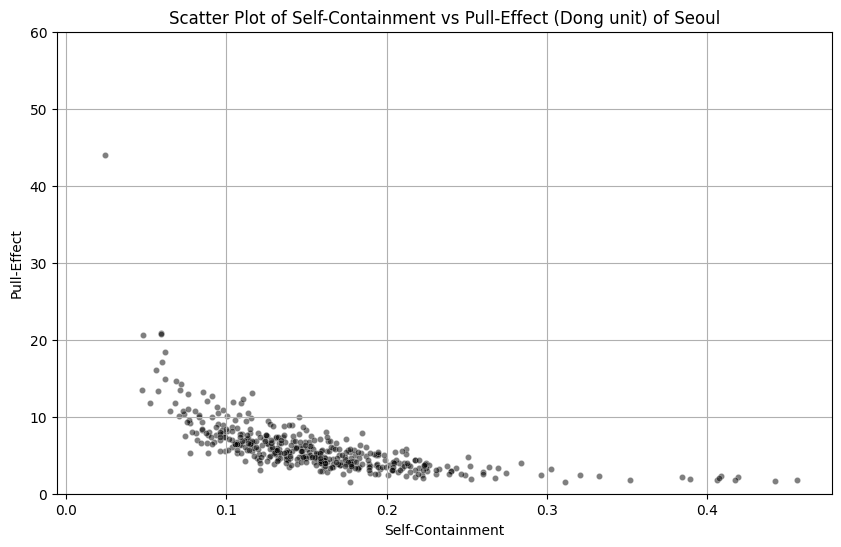

In [21]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Self-Containment', y='Pull-Effect', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Self-Containment vs Pull-Effect (Dong unit) of Seoul')
plt.xlabel('Self-Containment')
plt.ylabel('Pull-Effect')
plt.ylim(0, 60)  # Set y-axis range from 0 to 60
plt.grid(True)
plt.show()

In [22]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Self-Containment'], merged_df['Pull-Effect'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.49
P-value: 0.000


In [23]:
# Pull effect를 오름차순 정렬 후, 그래프 그려보기
# sort pull-effect in ascending order
merged_df = merged_df.sort_values(by='Pull-Effect', ascending=True)
# create the 'inv_rank' column
merged_df['inv_rank'] = range(1, len(merged_df) + 1)
merged_df.head()

,O_ADMDONG_CD,Self-Containment,Pull-Effect,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM,full_dong_name,gu,...,HH,regist_pop,regist_pop_per_HH,elderly_over_65,AREA_km2,pop_density,월_평균_소득_금액,지출_총금액,_merge,inv_rank
288,11560540,0.311285,1.526866,서울특별시 영등포구 여의동,서울특별시 영등포구,서울특별시,영등포구,여의동,영등포구여의동,영등포구,...,13307.0,32869.0,2.44,6448.0,8.40,3912.976190,5590853.0,1.017485e+11,both,1
276,11545510,0.177001,1.565108,서울특별시 금천구 가산동,서울특별시 금천구,서울특별시,금천구,가산동,금천구가산동,금천구,...,17607.0,26631.0,1.38,2911.0,2.52,10567.857143,2567594.0,3.791203e+10,both,2
310,11590605,0.442501,1.655982,서울특별시 동작구 흑석동,서울특별시 동작구,서울특별시,동작구,흑석동,동작구흑석동,동작구,...,12649.0,31020.0,2.27,5099.0,2.75,11280.000000,4224946.0,9.463976e+09,both,3
306,11590530,0.351676,1.738092,서울특별시 동작구 상도1동,서울특별시 동작구,서울특별시,동작구,상도1동,동작구상도1동,동작구,...,22665.0,46469.0,1.96,7500.0,0.98,47417.346939,3875896.0,6.938355e+09,both,4
191,11380690,0.417471,1.752012,서울특별시 은평구 진관동,서울특별시 은평구,서울특별시,은평구,진관동,은평구진관동,은평구,...,21429.0,55043.0,2.56,8814.0,0.63,87369.841270,4070863.0,1.597217e+10,both,5


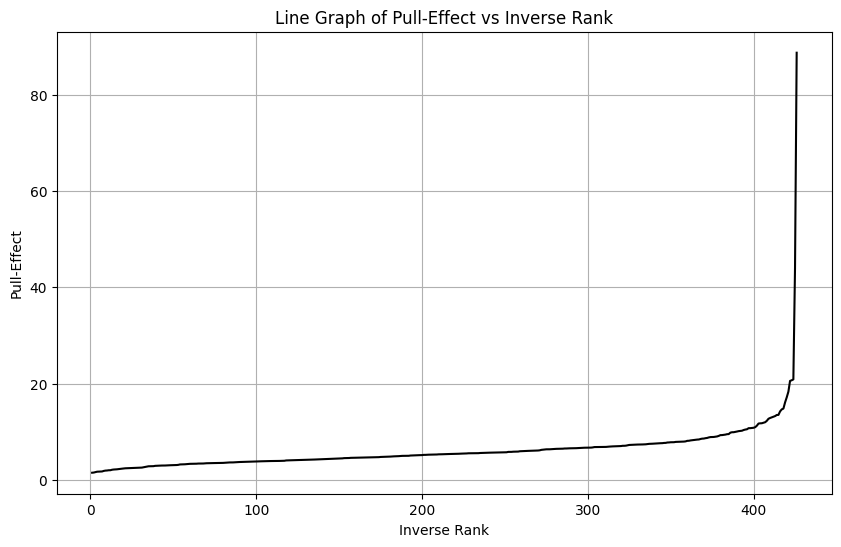

In [24]:
# draw the line graph having y-axis as Pull-Effect
# Plotting the line graph with adjusted marker size and color
plt.figure(figsize=(10, 6))
plt.plot(
    merged_df['inv_rank'],
    merged_df['Pull-Effect'],
    #marker='o',
    linestyle='-',
    color='k',
    markerfacecolor='black',
    #markeredgecolor='black',
    markersize=1
)
plt.title('Line Graph of Pull-Effect vs Inverse Rank')
plt.xlabel('Inverse Rank')
plt.ylabel('Pull-Effect')
plt.grid(True)
plt.show()

In [27]:
# rank and residual plot
merged_df.loc[:, 'log_inv_rank'] = np.log(merged_df['inv_rank'])
merged_df.loc[:, 'log_Pull_Effect'] = np.log(merged_df['Pull-Effect'])

X = sm.add_constant(merged_df['log_inv_rank'])
y = merged_df['log_Pull_Effect']

model = sm.OLS(y, X)
results = model.fit()

merged_df.loc[:, 'residuals'] = results.resid
merged_df.loc[:, 'predicted'] = results.predict(X)

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Pull_Effect   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1351.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          6.76e-134
Time:                        07:29:11   Log-Likelihood:                 4.7662
No. Observations:                 426   AIC:                            -5.532
Df Residuals:                     424   BIC:                             2.576
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5457      0.062     -8.851   

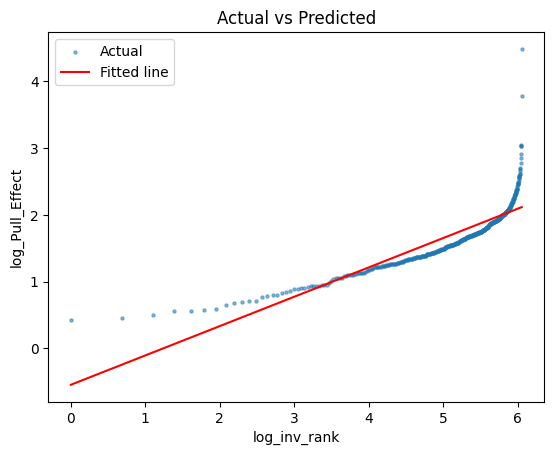

In [29]:
# line fit plot with rank and Pull-Effect
plt.scatter(merged_df['log_inv_rank'], merged_df['log_Pull_Effect'], s=5, alpha=0.5, label='Actual')
plt.plot(merged_df['log_inv_rank'], merged_df['predicted'], color='red', label='Fitted line')
plt.xlabel('log_inv_rank')
plt.ylabel('log_Pull_Effect')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

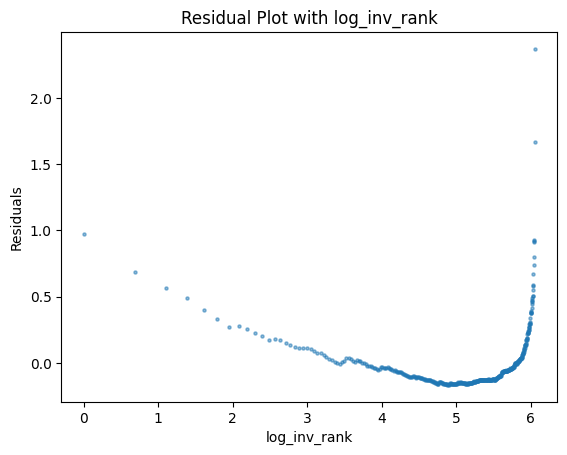

In [30]:
# Residual plot with rank and residuals
plt.scatter(merged_df['log_inv_rank'], merged_df['residuals'], s=5, alpha=0.5)
plt.xlabel('log_inv_rank')
plt.ylabel('Residuals')
plt.title('Residual Plot with log_inv_rank')
plt.show()

In [31]:
merged_df.columns

Index(['O_ADMDONG_CD', 'Self-Containment', 'Pull-Effect', 'FULL_NM',
       'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM', 'full_dong_name', 'gu',
       'dong', 'dong_cd', 'HH', 'regist_pop', 'regist_pop_per_HH',
       'elderly_over_65', 'AREA_km2', 'pop_density', '월_평균_소득_금액', '지출_총금액',
       '_merge', 'inv_rank', 'log_inv_rank', 'log_Pull_Effect', 'residuals',
       'predicted'],
      dtype='object')

In [32]:
merged_df.rename(columns={'월_평균_소득_금액': 'Average income', '지출_총금액': 'Total Spending'}, inplace=True)

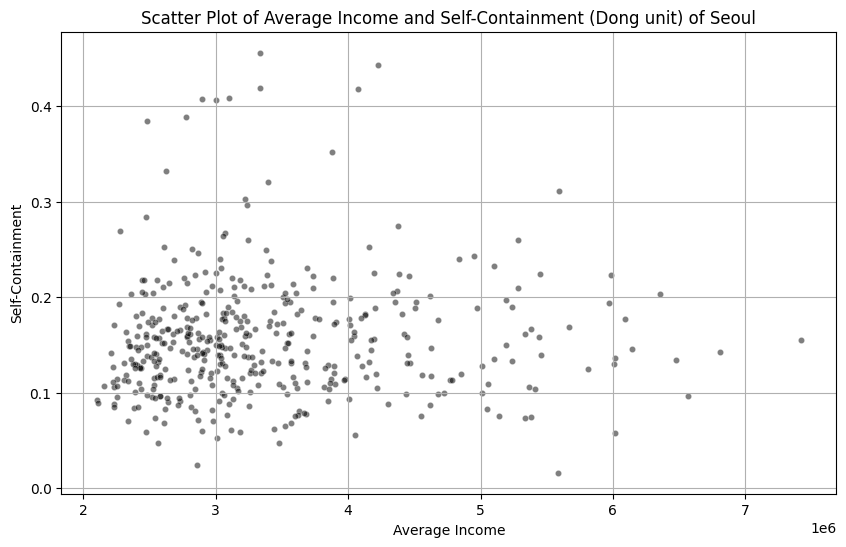

In [34]:
# Income Level and Self containment
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Average income', y='Self-Containment', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Average Income and Self-Containment (Dong unit) of Seoul')
plt.xlabel('Average Income')
plt.ylabel('Self-Containment')
plt.grid(True)
plt.show()

In [36]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Average income'], merged_df['Self-Containment'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.03
P-value: 0.540


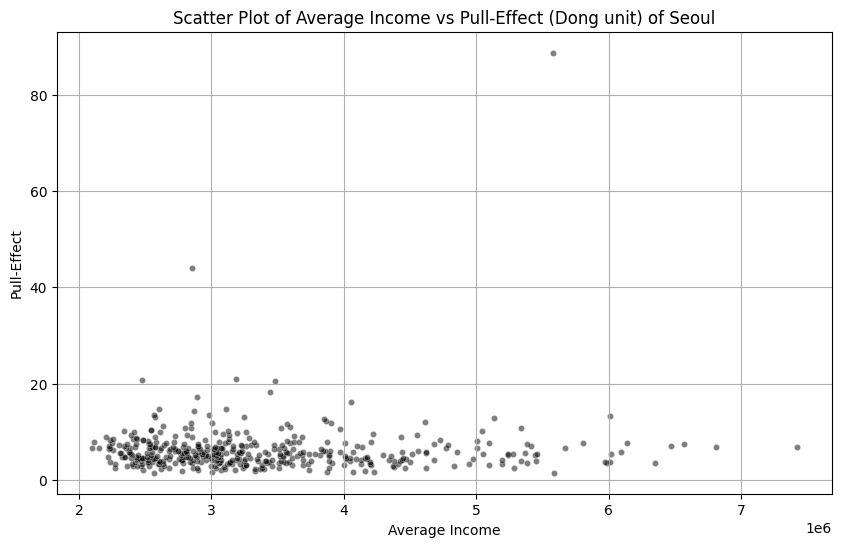

In [40]:
# Income Level and Pull-effect
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Average income', y='Pull-Effect', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Average Income vs Pull-Effect (Dong unit) of Seoul')
plt.xlabel('Average Income')
plt.ylabel('Pull-Effect')
plt.grid(True)
plt.show()

In [37]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Average income'], merged_df['Pull-Effect'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.05
P-value: 0.260


In [48]:
merged_df.columns

Index(['O_ADMDONG_CD', 'Self-Containment', 'Pull-Effect', 'FULL_NM',
       'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM', 'full_dong_name', 'gu',
       'dong', 'dong_cd', 'HH', 'regist_pop', 'regist_pop_per_HH',
       'elderly_over_65', 'AREA_km2', 'pop_density', 'Average income',
       'Total Spending', '_merge', 'inv_rank', 'log_inv_rank',
       'log_Pull_Effect', 'residuals', 'predicted'],
      dtype='object')

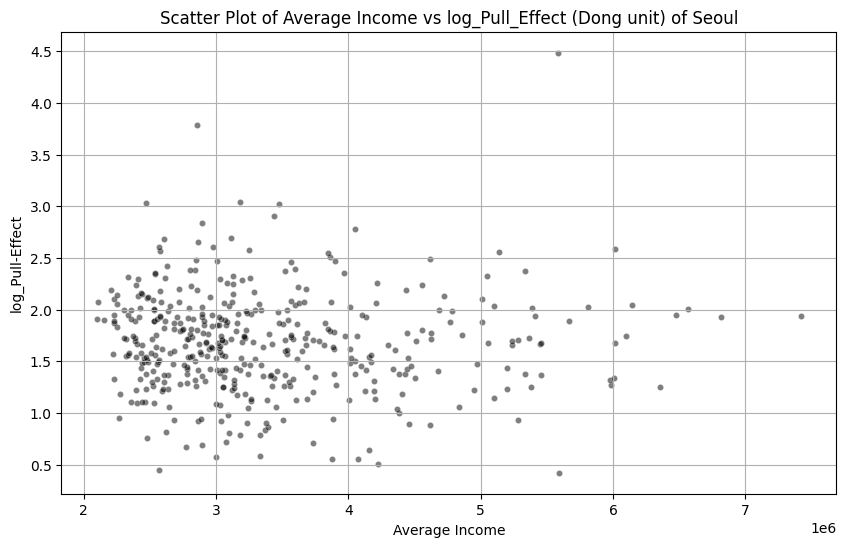

In [49]:
# Income Level and Log of Pull-effect
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Average income', y='log_Pull_Effect', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Average Income vs log_Pull_Effect (Dong unit) of Seoul')
plt.xlabel('Average Income')
plt.ylabel('log_Pull-Effect')
plt.grid(True)
plt.show()

In [50]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Average income'], merged_df['log_Pull_Effect'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.01
P-value: 0.760


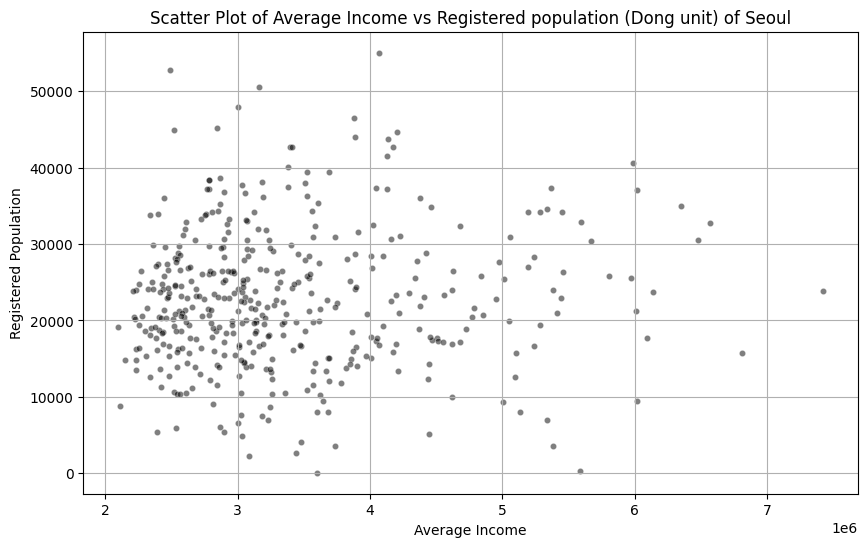

In [39]:
# Income Level and population
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Average income', y='regist_pop', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Average Income vs Registered population (Dong unit) of Seoul')
plt.xlabel('Average Income')
plt.ylabel('Registered Population')
plt.grid(True)
plt.show()

In [41]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Average income'], merged_df['regist_pop'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.06
P-value: 0.193


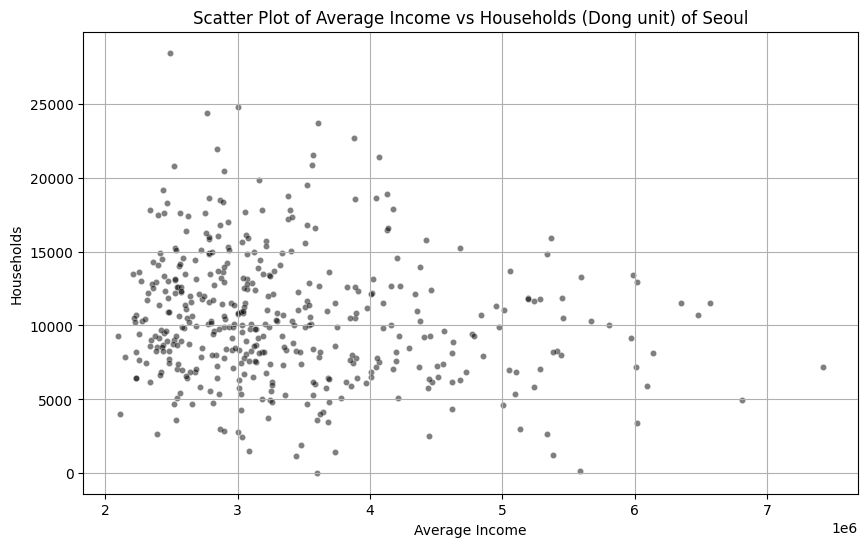

In [42]:
# Income Level and households
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Average income', y='HH', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Average Income vs Households (Dong unit) of Seoul')
plt.xlabel('Average Income')
plt.ylabel('Households')
plt.grid(True)
plt.show()

In [43]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Average income'], merged_df['HH'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.16
P-value: 0.001


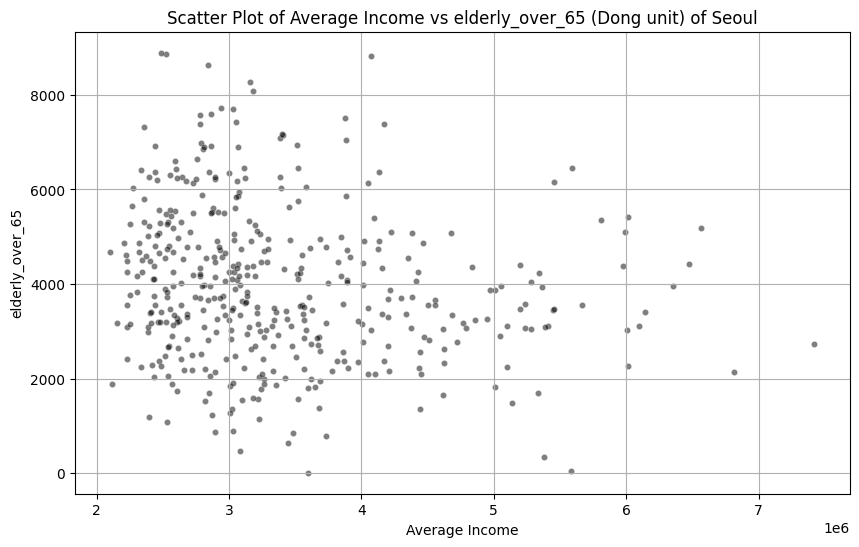

In [44]:
# Income Level and elderly_over_65
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Average income', y='elderly_over_65', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Average Income vs elderly_over_65 (Dong unit) of Seoul')
plt.xlabel('Average Income')
plt.ylabel('elderly_over_65')
plt.grid(True)
plt.show()

In [45]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Average income'], merged_df['elderly_over_65'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.17
P-value: 0.000


In [38]:
merged_df.columns

Index(['O_ADMDONG_CD', 'Self-Containment', 'Pull-Effect', 'FULL_NM',
       'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM', 'full_dong_name', 'gu',
       'dong', 'dong_cd', 'HH', 'regist_pop', 'regist_pop_per_HH',
       'elderly_over_65', 'AREA_km2', 'pop_density', 'Average income',
       'Total Spending', '_merge', 'inv_rank', 'log_inv_rank',
       'log_Pull_Effect', 'residuals', 'predicted'],
      dtype='object')

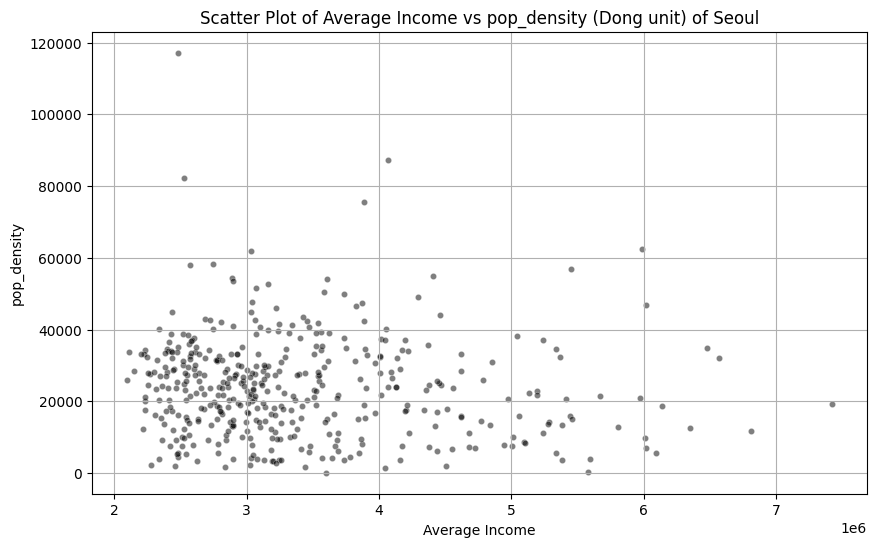

In [46]:
# Income Level and pop_density
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Average income', y='pop_density', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Average Income vs pop_density (Dong unit) of Seoul')
plt.xlabel('Average Income')
plt.ylabel('pop_density')
plt.grid(True)
plt.show()

In [47]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['Average income'], merged_df['pop_density'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.09
P-value: 0.062


In [53]:
merged_df.columns

Index(['O_ADMDONG_CD', 'Self-Containment', 'Pull-Effect', 'FULL_NM',
       'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM', 'full_dong_name', 'gu',
       'dong', 'dong_cd', 'HH', 'regist_pop', 'regist_pop_per_HH',
       'elderly_over_65', 'AREA_km2', 'pop_density', 'Average income',
       'Total Spending', '_merge', 'inv_rank', 'log_inv_rank',
       'log_Pull_Effect', 'residuals', 'predicted'],
      dtype='object')

In [56]:
# filtering pull-effect higher than 15
highpullgroup = merged_df[merged_df['Pull-Effect'] >= 15]
highpullgroup.loc[:, ['full_dong_name','regist_pop', 'HH', 'regist_pop_per_HH', 'elderly_over_65', 'pop_density', 'Average income']]

,full_dong_name,regist_pop,HH,regist_pop_per_HH,elderly_over_65,pop_density,Average income
211,마포구염리동,17695.0,7803.0,2.15,2106.0,40215.909091,4051438.0
21,중구장충동,5384.0,2869.0,1.60,877.0,3958.823529,2895026.0
2,종로구삼청동,2616.0,1144.0,2.02,632.0,1755.704698,3442534.0
7,종로구가회동,4084.0,1944.0,2.04,849.0,7562.962963,3479766.0
250,강서구화곡8동,24308.0,11828.0,2.02,4659.0,5171.914894,2473381.0
34,용산구남영동,7552.0,5027.0,1.41,1591.0,6346.218487,3183091.0
232,양천구신월6동,13934.0,5369.0,2.58,2061.0,11709.243697,2857257.0
345,서초구반포본동,283.0,132.0,2.02,42.0,280.198020,5583021.0


In [62]:
# Get summary statistics for the specified columns
summary_statistics = merged_df.loc[:,['regist_pop', 'HH', 'regist_pop_per_HH', 'elderly_over_65', 'pop_density', 'Average income']].describe()
# Round the summary statistics for the 'Average income' column to the nearest integer
summary_statistics['Average income'] = summary_statistics['Average income'].round().astype(int)

In [64]:
# Round the summary statistics for the specified columns to one decimal place
columns_to_round = ['regist_pop', 'HH', 'regist_pop_per_HH', 'elderly_over_65', 'pop_density']
summary_statistics[columns_to_round] = summary_statistics[columns_to_round].round(1)

In [65]:
summary_statistics

,regist_pop,HH,regist_pop_per_HH,elderly_over_65,pop_density,Average income
count,426.0,426.0,426.0,426.0,426.0,426
mean,22694.9,10477.4,2.1,3969.4,23866.3,3389964
std,9045.7,4345.6,0.4,1620.4,14116.0,954113
min,74.0,40.0,1.2,11.0,72.5,2099146
25%,16724.2,7496.8,1.9,2884.5,14119.9,2682646
50%,21932.0,10073.5,2.1,3763.5,23256.8,3117272
75%,27945.5,12953.8,2.3,4920.0,32144.4,3855699
max,55043.0,28449.0,3.3,8890.0,117177.8,7421305


In [67]:
summary_high = highpullgroup.loc[:, ['full_dong_name','regist_pop', 'HH', 'regist_pop_per_HH', 'elderly_over_65', 'pop_density', 'Average income']].describe()
summary_high['Average income'] = summary_high['Average income'].round().astype(int)
summary_high[columns_to_round] = summary_high[columns_to_round].round(1)
summary_high

,regist_pop,HH,regist_pop_per_HH,elderly_over_65,pop_density,Average income
count,8.0,8.0,8.0,8.0,8.0,8
mean,9482.0,4514.5,2.0,1602.1,9625.1,3495689
std,8353.8,3876.2,0.4,1428.1,12852.7,969544
min,283.0,132.0,1.4,42.0,280.2,2473381
25%,3717.0,1744.0,1.9,794.8,3408.0,2885584
50%,6468.0,3948.0,2.0,1234.0,5759.1,3312812
75%,14874.2,5977.5,2.1,2072.2,8599.5,3622684
max,24308.0,11828.0,2.6,4659.0,40215.9,5583021


In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   O_ADMDONG_CD       426 non-null    int64   
 1   Self-Containment   426 non-null    float64 
 2   Pull-Effect        426 non-null    float64 
 3   FULL_NM            426 non-null    object  
 4   full_gu_name       426 non-null    object  
 5   SIDO_NM            426 non-null    object  
 6   SGG_NM             426 non-null    object  
 7   ADMI_NM            426 non-null    object  
 8   full_dong_name     426 non-null    object  
 9   gu                 426 non-null    object  
 10  dong               426 non-null    object  
 11  dong_cd            426 non-null    float64 
 12  HH                 426 non-null    float64 
 13  regist_pop         426 non-null    float64 
 14  regist_pop_per_HH  426 non-null    float64 
 15  elderly_over_65    426 non-null    float64 
 16  AREA_km2

### De Facto Population Data Preprocessing

In [69]:
pop = pd.read_csv('/content/drive/MyDrive/FMC_Data/LOCAL_PEOPLE_DONG_202303/LOCAL_PEOPLE_DONG_202303.csv', engine='python')
pop.columns = ['hour_category', 'ADMDONG_CD', 'All_pop', 'M0_9', 'M10_14', 'M15_19', 'M20_24', 'M25_29',
              'M30_34', 'M35_39', 'M40_44', 'M45_49', 'M50_54', 'M55_59', 'M60_64', 'M65_69', 'M70_up', 'F0_9', 'F10_14', 'F15_19', 'F20_24', 'F25_29',
              'F30_34', 'F35_39', 'F40_44', 'F45_49', 'F50_54', 'F55_59', 'F60_64', 'F65_69', 'F70_up', 'novalues']

In [ ]:
pop.head()

,hour_category,ADMDONG_CD,All_pop,M0_9,M10_14,M15_19,M20_24,M25_29,M30_34,M35_39,...,F30_34,F35_39,F40_44,F45_49,F50_54,F55_59,F60_64,F65_69,F70_up,novalues
20230301,0,11500605,12152.9760,314.2590,99.2728,147.1853,125.0909,326.6752,600.0004,840.6125,...,761.3044,767.4585,391.5118,392.7704,377.4368,484.7090,509.1466,419.8514,1164.6325,NaN
20230301,0,11530750,26973.1386,1162.3654,452.8302,684.9993,578.3383,754.6888,901.7400,1170.0395,...,1137.1146,1210.0504,964.0278,1156.5304,962.3229,1291.0357,1142.7477,859.0726,2118.4307,NaN
20230301,0,11140650,9021.9829,307.1753,142.0813,156.1640,228.6131,390.8249,397.4347,403.5795,...,401.4260,437.3798,358.1555,333.1254,313.1381,425.0811,326.8493,198.8057,580.5874,NaN
20230301,0,11200645,26758.6325,1678.3430,465.1377,402.1320,400.6940,536.1799,709.9476,1474.4158,...,1053.7237,1718.0640,1432.6263,1255.1849,963.4359,1030.2344,956.1777,808.9140,1691.4118,NaN
20230301,0,11470610,4062.9669,132.5704,86.6805,108.5833,83.5500,119.4311,149.3410,205.6582,...,148.7245,169.2240,183.6700,162.8845,144.1637,178.7602,172.3166,128.2686,309.6982,NaN


In [88]:
# pop 10 am to 5 pm
pop_day = pop[(pop['hour_category'] >= 10) & (pop['hour_category'] <= 17)]

# pop 7 pm (19) to 11 pm (23)
pop_even = pop[(pop['hour_category'] >= 19) & (pop['hour_category'] <= 23)]

# pop 0 am to 5 am
pop_night = pop[(pop['hour_category'] >= 0) & (pop['hour_category'] <= 5)]

In [89]:
# Calculate mean of 'All_pop' for each subgroup aggregated by 'ADMDONG_CD'
mean_pop_day = pop_day.groupby('ADMDONG_CD')['All_pop'].mean().reset_index().rename(columns={'All_pop': 'pop_day'})
mean_pop_even = pop_even.groupby('ADMDONG_CD')['All_pop'].mean().reset_index().rename(columns={'All_pop': 'pop_even'})
mean_pop_night = pop_night.groupby('ADMDONG_CD')['All_pop'].mean().reset_index().rename(columns={'All_pop': 'pop_night'})

In [70]:
num_unique_values = pop.ADMDONG_CD.nunique()
num_unique_values

424

In [90]:
# Calculate the overall mean 'All_pop' aggregated by 'ADMDONG_CD'
df_avg_pop = pop.groupby('ADMDONG_CD')['All_pop'].mean().reset_index()

In [91]:
# Merge the mean values of each subgroup into df_avg_pop
df_avg_pop = df_avg_pop.merge(mean_pop_day, on='ADMDONG_CD', how='left')
df_avg_pop = df_avg_pop.merge(mean_pop_even, on='ADMDONG_CD', how='left')
df_avg_pop = df_avg_pop.merge(mean_pop_night, on='ADMDONG_CD', how='left')

In [92]:
df_avg_pop

,ADMDONG_CD,All_pop,pop_day,pop_even,pop_night
0,11110515,18490.636366,22764.928625,15540.243662,15536.578539
1,11110530,25468.544788,38669.909753,19899.427852,12562.808277
2,11110540,5994.128247,8955.262907,4403.752663,3714.633690
3,11110550,14177.413914,14623.881172,13568.003504,14163.015759
4,11110560,17815.873594,16642.971492,18076.485135,19008.752418
...,...,...,...,...,...
419,11740650,23320.440226,21152.246508,24548.487386,25483.540820
420,11740660,27011.381976,25919.255473,28070.301445,28104.395551
421,11740685,55860.206574,53228.513299,57382.971513,58845.395184
422,11740690,5006.747107,4973.399346,4454.051931,4970.659124


In [94]:
merged_df.columns

Index(['Unnamed: 0', 'O_ADMDONG_CD', 'Self-Containment', 'Pull-Effect',
       'FULL_NM', 'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM',
       'full_dong_name', 'gu', 'dong', 'dong_cd', 'HH', 'regist_pop',
       'regist_pop_per_HH', 'elderly_over_65', 'AREA_km2', 'pop_density',
       '월_평균_소득_금액', '지출_총금액', '_merge'],
      dtype='object')

In [95]:
merged_df = merged_df.drop(columns=['_merge'])

In [96]:
# merge 'All_pop' of df_avg_pop dataframe
merged_df = pd.merge(merged_df, df_avg_pop, left_on = 'O_ADMDONG_CD', right_on = 'ADMDONG_CD', how = 'left', indicator=True)
merged_df = merged_df.drop(columns=['ADMDONG_CD'])
merged_df.head()

,Unnamed: 0,O_ADMDONG_CD,Self-Containment,Pull-Effect,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM,full_dong_name,...,elderly_over_65,AREA_km2,pop_density,월_평균_소득_금액,지출_총금액,All_pop,pop_day,pop_even,pop_night,_merge
0,0,11110515,0.176837,5.445308,서울특별시 종로구 청운효자동,서울특별시 종로구,서울특별시,종로구,청운효자동,종로구청운효자동,...,2172,2.57,4577.431907,3780222,2784933000,18490.636366,22764.928625,15540.243662,15536.578539,both
1,1,11110530,0.100082,8.162255,서울특별시 종로구 사직동,서울특별시 종로구,서울특별시,종로구,사직동,종로구사직동,...,1832,1.23,7618.699187,5007768,56096531000,25468.544788,38669.909753,19899.427852,12562.808277,both
2,2,11110540,0.061663,18.346646,서울특별시 종로구 삼청동,서울특별시 종로구,서울특별시,종로구,삼청동,종로구삼청동,...,632,1.49,1755.704698,3442534,3103159000,5994.128247,8955.262907,4403.752663,3714.633690,both
3,3,11110550,0.186918,4.935858,서울특별시 종로구 부암동,서울특별시 종로구,서울특별시,종로구,부암동,종로구부암동,...,1830,2.27,4167.400881,3647449,1385759000,14177.413914,14623.881172,13568.003504,14163.015759,both
4,4,11110560,0.188736,3.819283,서울특별시 종로구 평창동,서울특별시 종로구,서울특별시,종로구,평창동,종로구평창동,...,3548,8.87,2000.338219,4504006,2539729000,17815.873594,16642.971492,18076.485135,19008.752418,both


In [98]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         426 non-null    int64   
 1   O_ADMDONG_CD       426 non-null    int64   
 2   Self-Containment   426 non-null    float64 
 3   Pull-Effect        426 non-null    float64 
 4   FULL_NM            426 non-null    object  
 5   full_gu_name       426 non-null    object  
 6   SIDO_NM            426 non-null    object  
 7   SGG_NM             426 non-null    object  
 8   ADMI_NM            426 non-null    object  
 9   full_dong_name     426 non-null    object  
 10  gu                 426 non-null    object  
 11  dong               426 non-null    object  
 12  dong_cd            426 non-null    int64   
 13  HH                 426 non-null    int64   
 14  regist_pop         426 non-null    int64   
 15  regist_pop_per_HH  426 non-null    float64 
 16  elderly_

In [99]:
# Filter rows where the merge indicator indicates the row is only present in df_avg_pop
unmatched_rows = merged_df[merged_df['_merge'] == 'left_only']
unmatched_rows

,Unnamed: 0,O_ADMDONG_CD,Self-Containment,Pull-Effect,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM,full_dong_name,...,elderly_over_65,AREA_km2,pop_density,월_평균_소득_금액,지출_총금액,All_pop,pop_day,pop_even,pop_night,_merge
135,135,11305595,0.130893,7.373674,서울특별시 강북구 번1동,서울특별시 강북구,서울특별시,강북구,번1동,강북구번1동,...,3842,0.66,28169.696970,2303972,6666987000,NaN,NaN,NaN,NaN,left_only
136,136,11305603,0.113133,5.635235,서울특별시 강북구 번2동,서울특별시 강북구,서울특별시,강북구,번2동,강북구번2동,...,4162,0.95,16100.000000,2308539,992519000,NaN,NaN,NaN,NaN,left_only
137,137,11305608,0.127436,5.757882,서울특별시 강북구 번3동,서울특별시 강북구,서울특별시,강북구,번3동,강북구번3동,...,4808,1.10,14831.818182,2548326,2000183000,NaN,NaN,NaN,NaN,left_only
138,138,11305615,0.126643,4.822025,서울특별시 강북구 수유1동,서울특별시 강북구,서울특별시,강북구,수유1동,강북구수유1동,...,4606,1.67,12270.059880,2220463,4724353000,NaN,NaN,NaN,NaN,left_only
139,139,11305625,0.118339,6.852364,서울특별시 강북구 수유2동,서울특별시 강북구,서울특별시,강북구,수유2동,강북구수유2동,...,5185,0.57,36817.543860,2577008,2191966000,NaN,NaN,NaN,NaN,left_only
140,140,11305635,0.140997,8.924936,서울특별시 강북구 수유3동,서울특별시 강북구,서울특별시,강북구,수유3동,강북구수유3동,...,4864,0.72,33169.444444,2205999,11342761000,NaN,NaN,NaN,NaN,left_only
275,275,11530800,0.158284,4.110543,서울특별시 구로구 항동,서울특별시 구로구,서울특별시,구로구,항동,구로구항동,...,1846,1.40,11838.571429,3007261,1159043000,NaN,NaN,NaN,NaN,left_only
374,374,11680675,0.075310,9.338662,서울특별시 강남구 개포3동,서울특별시 강남구,서울특별시,강남구,개포3동,강남구개포3동,...,3567,2.58,6661.240310,4553185,1437085000,NaN,NaN,NaN,NaN,left_only
408,408,11740525,0.230701,3.108630,서울특별시 강동구 상일1동,서울특별시 강동구,서울특별시,강동구,상일1동,강동구상일1동,...,4956,1.82,21667.582418,3690212,3300388000,NaN,NaN,NaN,NaN,left_only
409,409,11740526,0.111497,4.261794,서울특별시 강동구 상일2동,서울특별시 강동구,서울특별시,강동구,상일2동,강동구상일2동,...,1941,1.09,11025.688073,3690212,3300388000,NaN,NaN,NaN,NaN,left_only


In [101]:
# Transform variables
merged_df.loc[:,'log_All_pop'] = np.log(merged_df['All_pop'])
merged_df.loc[:,'log_pop_day'] = np.log(merged_df['pop_day'])
merged_df.loc[:,'log_pop_even'] = np.log(merged_df['pop_even'])
merged_df.loc[:,'log_pop_night'] = np.log(merged_df['pop_night'])

In [102]:
merged_df.columns

Index(['Unnamed: 0', 'O_ADMDONG_CD', 'Self-Containment', 'Pull-Effect',
       'FULL_NM', 'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM',
       'full_dong_name', 'gu', 'dong', 'dong_cd', 'HH', 'regist_pop',
       'regist_pop_per_HH', 'elderly_over_65', 'AREA_km2', 'pop_density',
       '월_평균_소득_금액', '지출_총금액', 'All_pop', 'pop_day', 'pop_even', 'pop_night',
       '_merge', 'log_All_pop', 'log_pop_day', 'log_pop_even',
       'log_pop_night'],
      dtype='object')

In [103]:
merged_df_Seoul = merged_df

In [104]:
null_all_pop_rows = merged_df_Seoul[merged_df_Seoul['All_pop'].isnull()]
null_all_pop_rows

,Unnamed: 0,O_ADMDONG_CD,Self-Containment,Pull-Effect,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM,full_dong_name,...,지출_총금액,All_pop,pop_day,pop_even,pop_night,_merge,log_All_pop,log_pop_day,log_pop_even,log_pop_night
135,135,11305595,0.130893,7.373674,서울특별시 강북구 번1동,서울특별시 강북구,서울특별시,강북구,번1동,강북구번1동,...,6666987000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
136,136,11305603,0.113133,5.635235,서울특별시 강북구 번2동,서울특별시 강북구,서울특별시,강북구,번2동,강북구번2동,...,992519000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
137,137,11305608,0.127436,5.757882,서울특별시 강북구 번3동,서울특별시 강북구,서울특별시,강북구,번3동,강북구번3동,...,2000183000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
138,138,11305615,0.126643,4.822025,서울특별시 강북구 수유1동,서울특별시 강북구,서울특별시,강북구,수유1동,강북구수유1동,...,4724353000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
139,139,11305625,0.118339,6.852364,서울특별시 강북구 수유2동,서울특별시 강북구,서울특별시,강북구,수유2동,강북구수유2동,...,2191966000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
140,140,11305635,0.140997,8.924936,서울특별시 강북구 수유3동,서울특별시 강북구,서울특별시,강북구,수유3동,강북구수유3동,...,11342761000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
275,275,11530800,0.158284,4.110543,서울특별시 구로구 항동,서울특별시 구로구,서울특별시,구로구,항동,구로구항동,...,1159043000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
374,374,11680675,0.075310,9.338662,서울특별시 강남구 개포3동,서울특별시 강남구,서울특별시,강남구,개포3동,강남구개포3동,...,1437085000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
408,408,11740525,0.230701,3.108630,서울특별시 강동구 상일1동,서울특별시 강동구,서울특별시,강동구,상일1동,강동구상일1동,...,3300388000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN
409,409,11740526,0.111497,4.261794,서울특별시 강동구 상일2동,서울특별시 강동구,서울특별시,강동구,상일2동,강동구상일2동,...,3300388000,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN


In [105]:
merged_df.to_excel("/content/drive/MyDrive/FMC_Data/matched_Seoul_dong_y_and_Xvariables_with_different time zone de facto populations.xlsx")

#### Seoul only with population

In [ ]:
# Replace drop any rows containing NaN
merged_df_Seoul = merged_df_Seoul.dropna()

# Add a constant to the independent values
X = sm.add_constant(merged_df_Seoul['log_All_pop'])

# Create a model
model = sm.OLS(merged_df_Seoul['log_Pull_Effect'], X)

# Fit the model
results = model.fit()

# Get the beta coefficient
beta = results.params['log_All_pop']

print("The beta coefficient is", beta)

The beta coefficient is -0.49763476470087625


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Pull_Effect   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     142.9
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.67e-28
Time:                        03:44:15   Log-Likelihood:                -234.00
No. Observations:                 416   AIC:                             472.0
Df Residuals:                     414   BIC:                             480.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.6486      0.416     15.972      

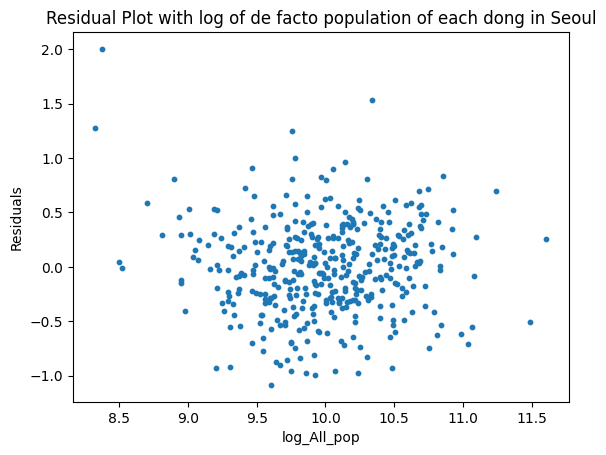

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
merged_df_Seoul['residuals'] = results.resid

# Create a scatter plot
plt.scatter(merged_df_Seoul['log_All_pop'], merged_df_Seoul['residuals'], s=10)
plt.xlabel('log_All_pop')
plt.ylabel('Residuals')
plt.title('Residual Plot with log of de facto population of each dong in Seoul')
plt.show()

<ipython-input-27-183d48b0c578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_Seoul['predicted'] = results.predict(X)


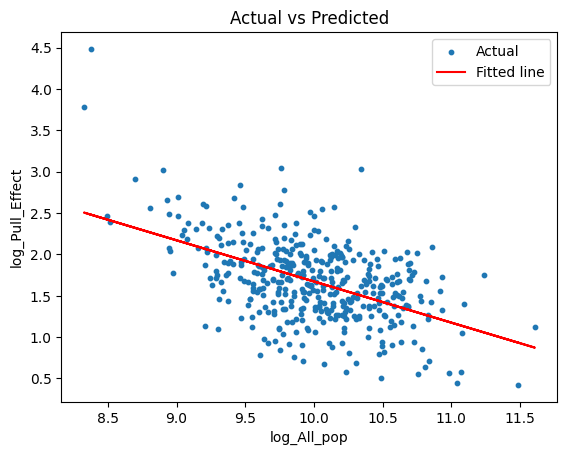

In [ ]:
# Calculate predicted values
merged_df_Seoul['predicted'] = results.predict(X)

plt.scatter(merged_df_Seoul['log_All_pop'], merged_df_Seoul['log_Pull_Effect'], s=10, label='Actual')
plt.plot(merged_df_Seoul['log_All_pop'], merged_df_Seoul['predicted'], color='red', label='Fitted line')
plt.xlabel('log_All_pop')
plt.ylabel('log_Pull_Effect')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
#@title exploring: The two outliers on the left top
df = pd.read_csv("/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_Dong-Dong count_2023_03_ver2.csv")

In [ ]:
df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44


In [ ]:
# 양천구 신월6동이 destination인 데이터 filtering
df_11470610 = df.loc[df['D_ADMDONG_CD'] == 11470610, :]
# 1: Going to Work, 2 : Going to School, 3: Going back to home, 4: Shopping, 5: Sightseeing/Tourism, 6: Hospital, 7: Others
columns_to_sum = ['CNT_1', 'CNT_3', 'CNT_24567', 'RT-NonWork_CNT', 'RT-Work_CNT']
column_sums = df_11470610[columns_to_sum].sum()
column_sums

,0
CNT_1,28263.39
CNT_3,66807.67
CNT_24567,114919.72
RT-NonWork_CNT,88618.25
RT-Work_CNT,-21810.58


In [ ]:
df_11470610.groupby(['D_ADMDONG_CD'])

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT
232,11110515,11470610,0.00,4.5,6.70,6.70,-2.20
2704,11110530,11470610,0.00,182.2,61.55,61.55,120.65
5045,11110540,11470610,0.00,0.0,2.88,2.88,-2.88
6702,11110550,11470610,0.00,0.0,5.32,5.32,-5.32
8521,11110560,11470610,0.00,4.5,18.47,18.47,-13.97
...,...,...,...,...,...,...,...
3120564,47820250,11470610,0.00,0.0,2.56,2.56,-2.56
3160200,48240250,11470610,0.00,0.0,3.50,3.50,-3.50
3190618,48880250,11470610,0.00,0.0,3.65,3.65,-3.65
3195624,50110540,11470610,0.00,0.0,3.58,3.58,-3.58


In [ ]:
#@title rank and residual plot
merged_df_Seoul.loc[:, 'log_inv_rank'] = np.log(merged_df_Seoul['inv_rank'])
X = sm.add_constant(merged_df_Seoul['log_inv_rank'])
y = merged_df_Seoul['log_Pull_Effect']

model = sm.OLS(y, X)
results = model.fit()

merged_df_Seoul.loc[:, 'residuals'] = results.resid
merged_df_Seoul.loc[:, 'predicted'] = results.predict(X)

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Pull_Effect   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1454.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          1.53e-137
Time:                        03:49:03   Log-Likelihood:                 17.738
No. Observations:                 416   AIC:                            -31.48
Df Residuals:                     414   BIC:                            -23.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.6237      0.113    -23.140   

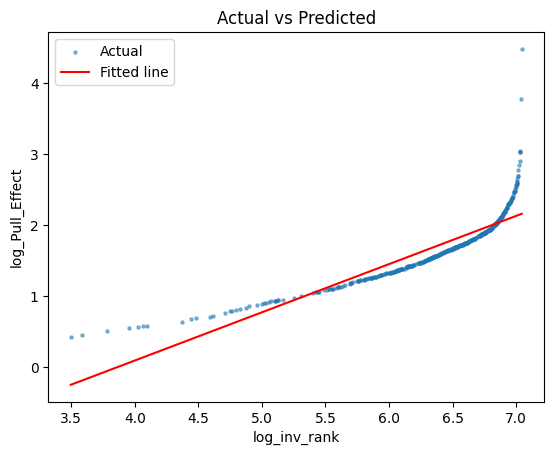

In [ ]:
# line fit plot with rank and Pull-Effect
plt.scatter(merged_df_Seoul['log_inv_rank'], merged_df_Seoul['log_Pull_Effect'], s=5, alpha=0.5, label='Actual')
plt.plot(merged_df_Seoul['log_inv_rank'], merged_df_Seoul['predicted'], color='red', label='Fitted line')
plt.xlabel('log_inv_rank')
plt.ylabel('log_Pull_Effect')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

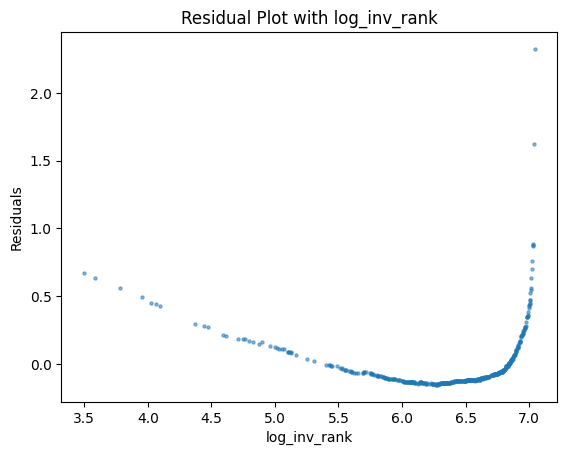

In [ ]:
# Residual plot with rank and residuals
plt.scatter(merged_df_Seoul['log_inv_rank'], merged_df_Seoul['residuals'], s=5, alpha=0.5)
plt.xlabel('log_inv_rank')
plt.ylabel('Residuals')
plt.title('Residual Plot with log_inv_rank')
plt.show()

In [ ]:
merged_df.to_excel("/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/AllMetropolitan_dong_Analysis_20241010.xlsx")

In [ ]:
merged_df_Seoul.to_excel("/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/Seoul_dong_Analysis_20241010.xlsx")